## Reading and Understanding data

In [1]:
#Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data into a dataframe 'df'
df = pd.read_csv('train.csv')

In [3]:
#Checking columns and no. of rows and other details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Checking data in the dataframe
pd.set_option('display.max_columns', 100)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
#Getting summary for numeric columns in the dataframe
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
#Checking the maximum number of null or missing values by sorting the count in descending order
df.isnull().sum().sort_values(ascending=False).head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
YearBuilt          0
dtype: int64

In [7]:
#Finding percent of missing values
round(100*(df.isnull().sum().sort_values(ascending=False).head(20)/len(df.index)), 2)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
dtype: float64

In [8]:
#Dropping all columns with max null values present
df = df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis=1)

In [9]:
#Finding percent of missing values
round(100*(df.isnull().sum().sort_values(ascending=False).head(20)/len(df.index)), 2)

GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
YearRemodAdd    0.00
ExterQual       0.00
ExterCond       0.00
Exterior2nd     0.00
Exterior1st     0.00
Foundation      0.00
BsmtFinSF1      0.00
dtype: float64

In [10]:
#Analysing the data trend by segregating the dataframe into 3 subparts
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [11]:
subdf1 = df[['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual','ExterCond', 
             'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF' , 'SalePrice']]

In [12]:
subdf2 = df[['LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea' , 'SalePrice']]

In [13]:
subdf3 = df[['GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

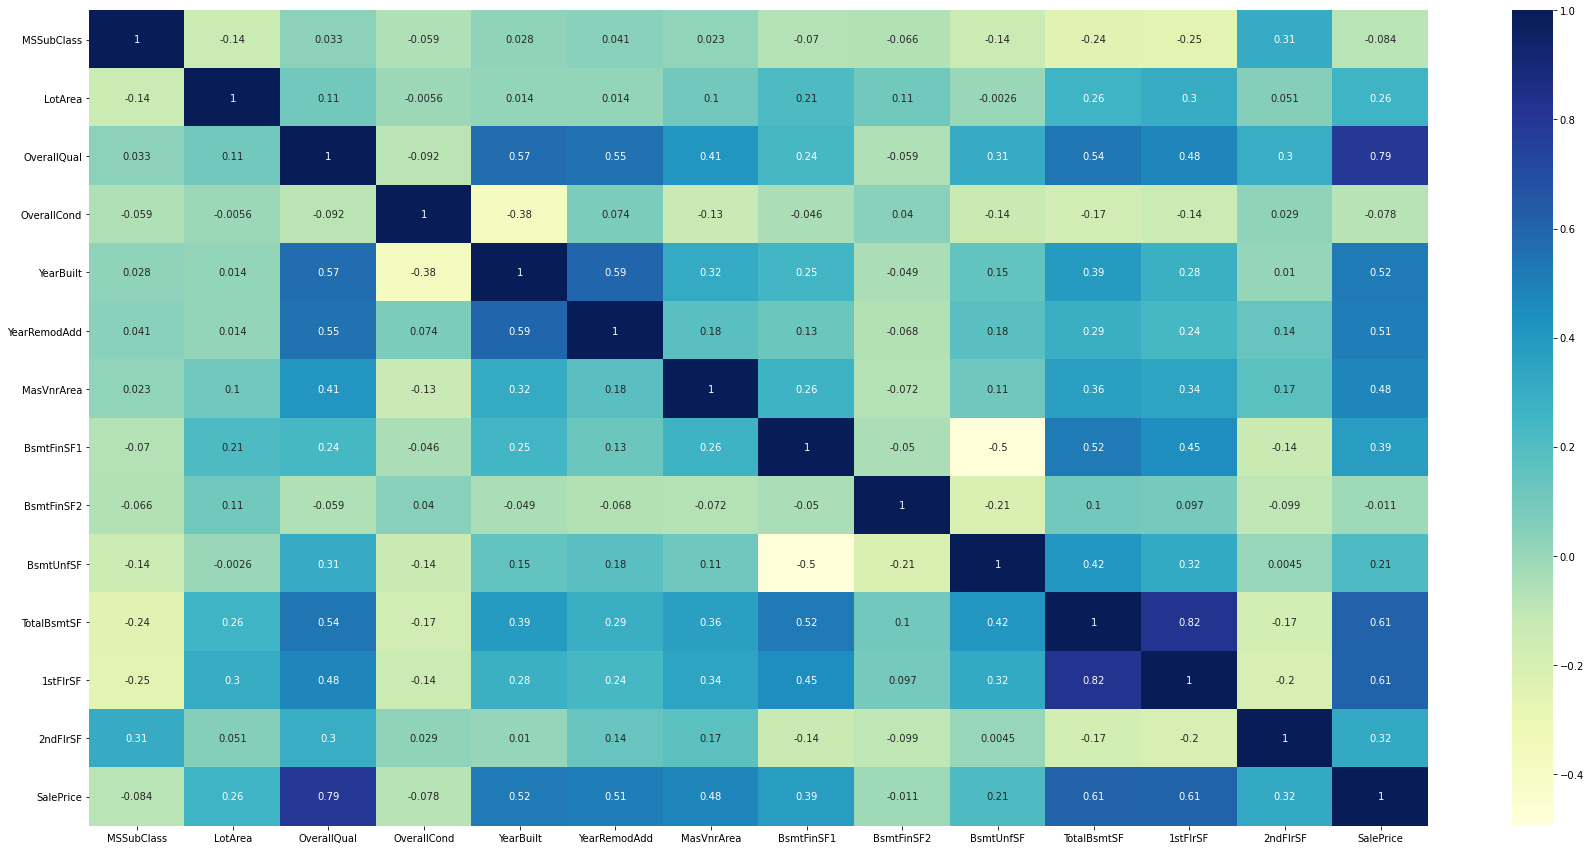

In [14]:
#Heatmap to find correlation of each variable with 'SalePrice'
plt.figure(figsize = (30, 15))
sns.heatmap(subdf1.corr(), annot = True, cmap="YlGnBu")
plt.show()

After analyzing correlation of variables for subpart-1, we found following observations:
- 'OverallQual', 'TotalBsmtSF', '1stFlrSF' are the top highly correlated features with the target variable 'SalePrice'.
- 'YearBuilt', 'YearRemodAdd' and 'MasVnrArea' are the next set of variables with good correlation with the target.

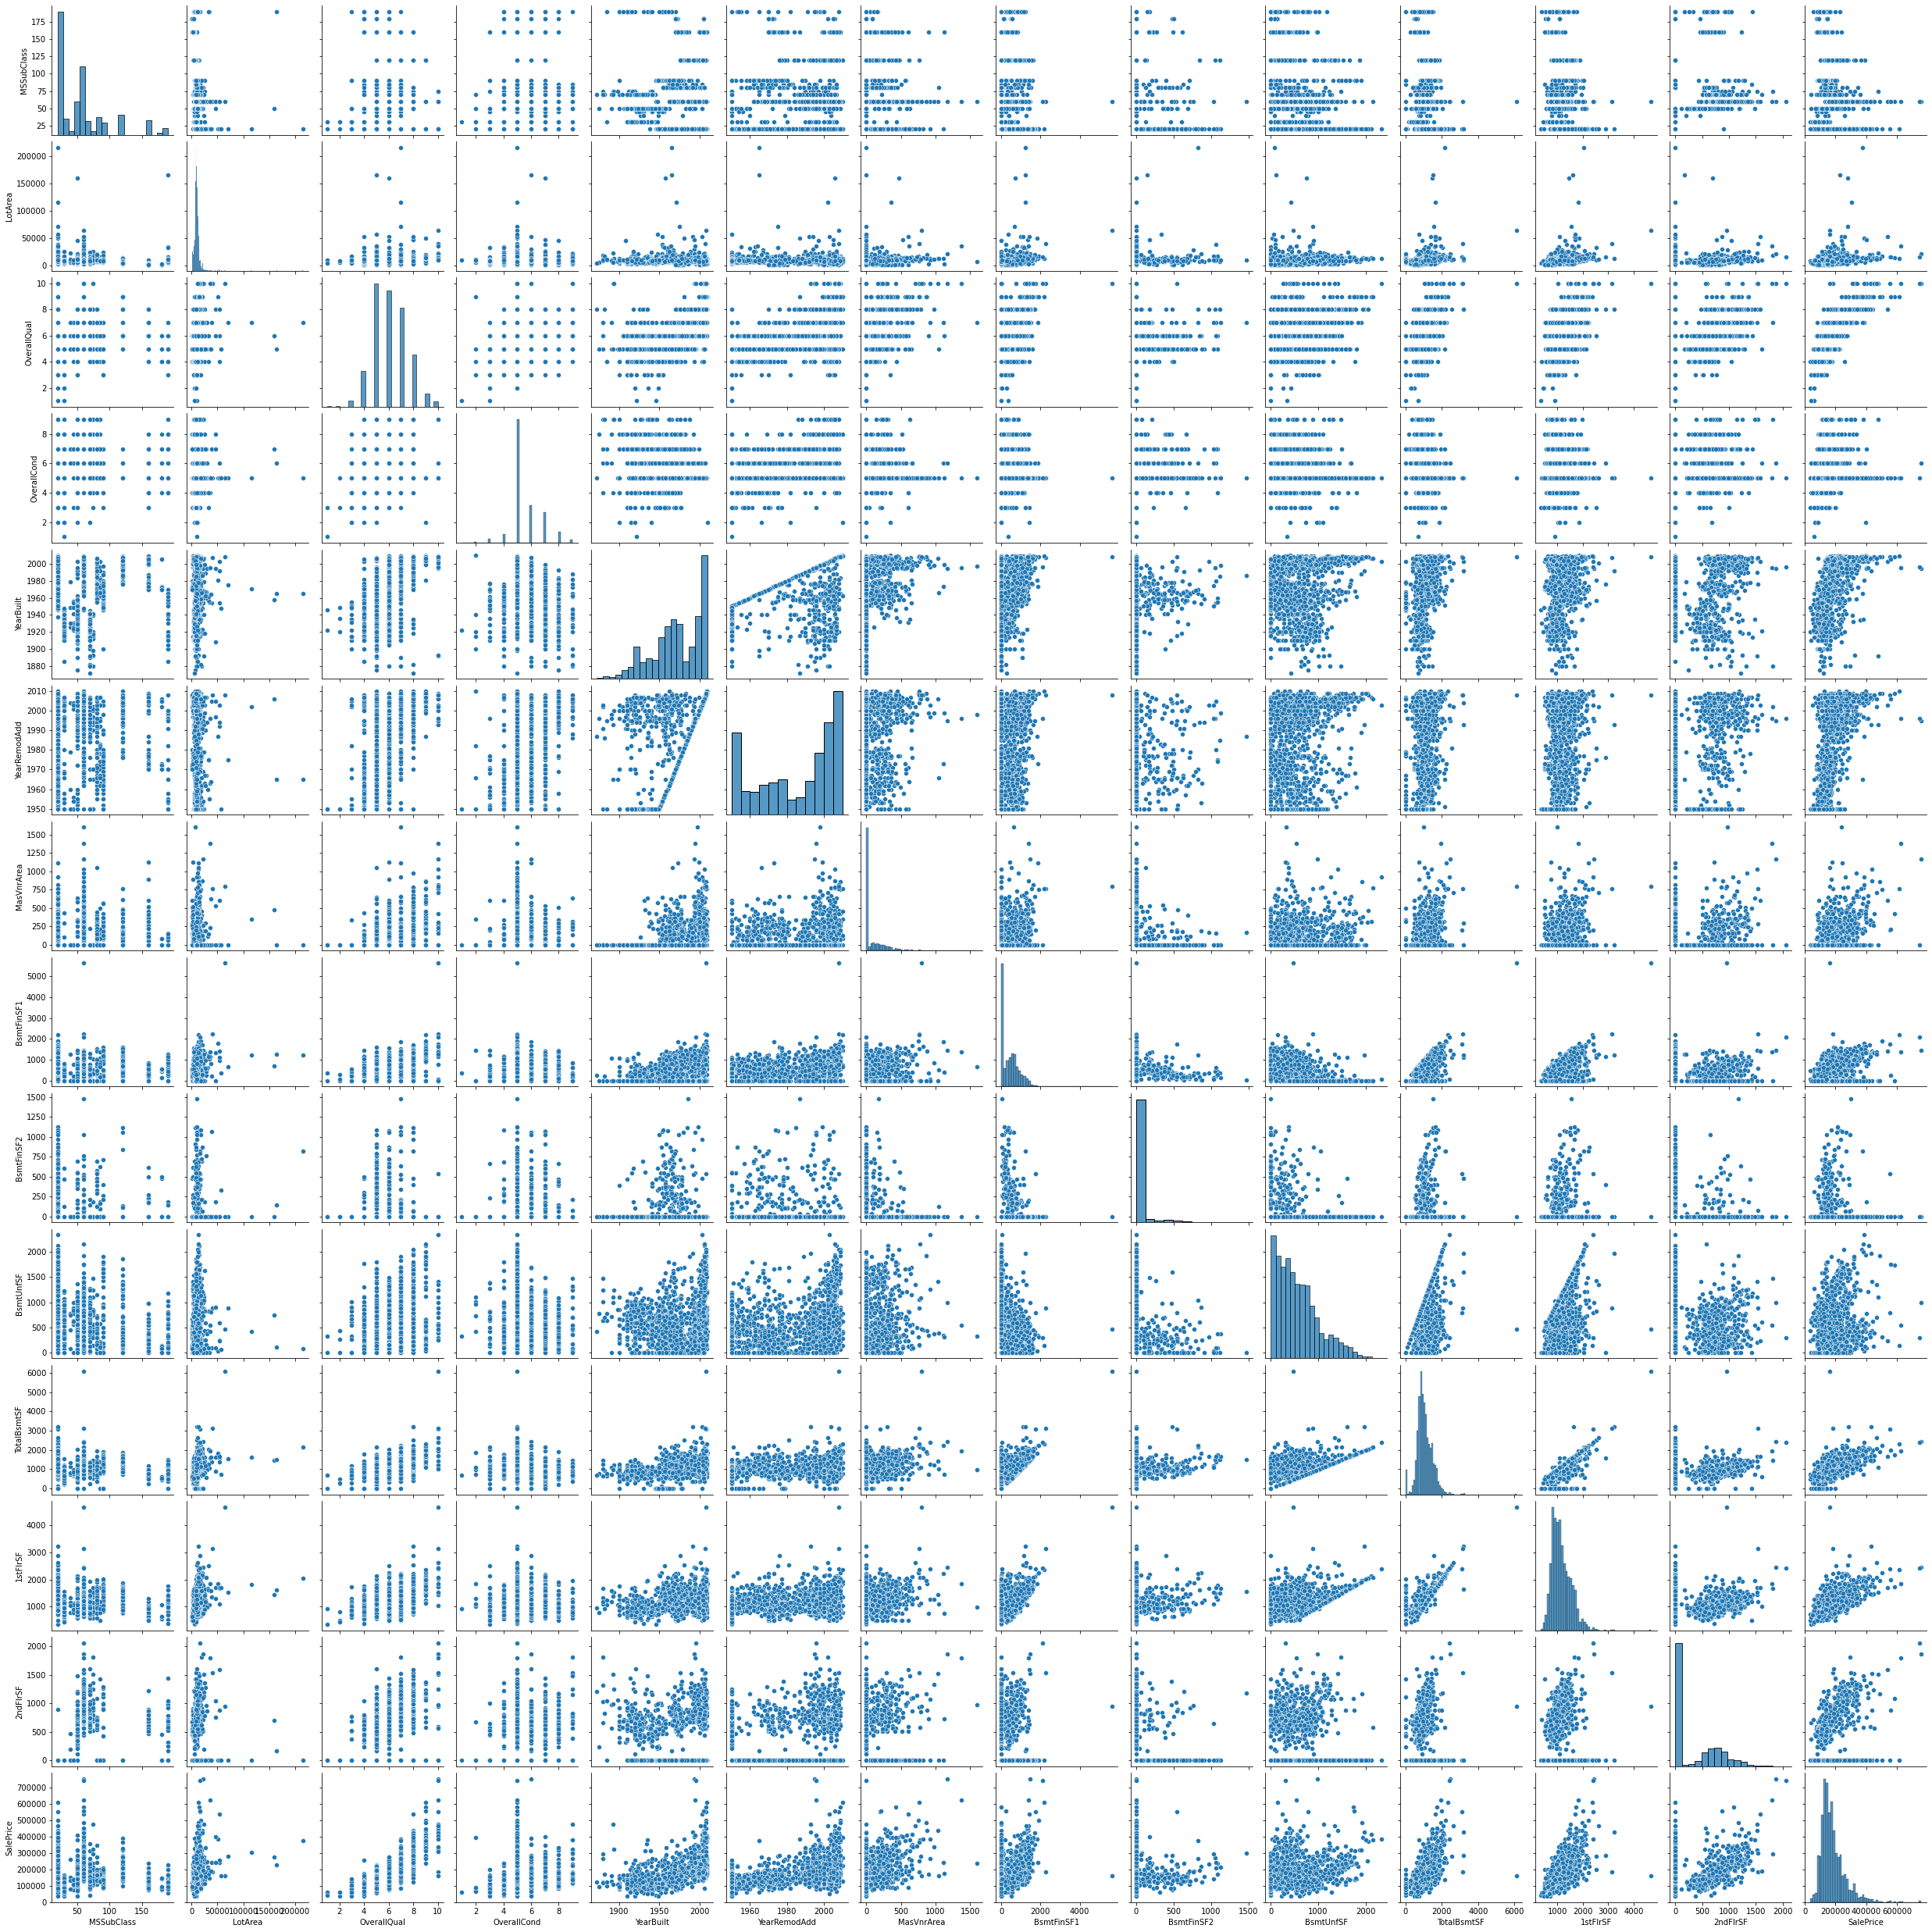

In [15]:
#Analzying relationship between variables using sub-parts of the data frame
sns.pairplot(subdf1)
plt.show()

After analyzing pairplot of variables for subpart-1, we found following observations:
- 'OverallQual', 'TotalBsmtSF', '1stFlrSF' have a good linear relationship with the target variable 'SalePrice'.
- 'OverallCond', 'YearBuilt', 'YearRemodAdd' and '2ndFlrSF' have a good linear relationship with good correlation with the target.

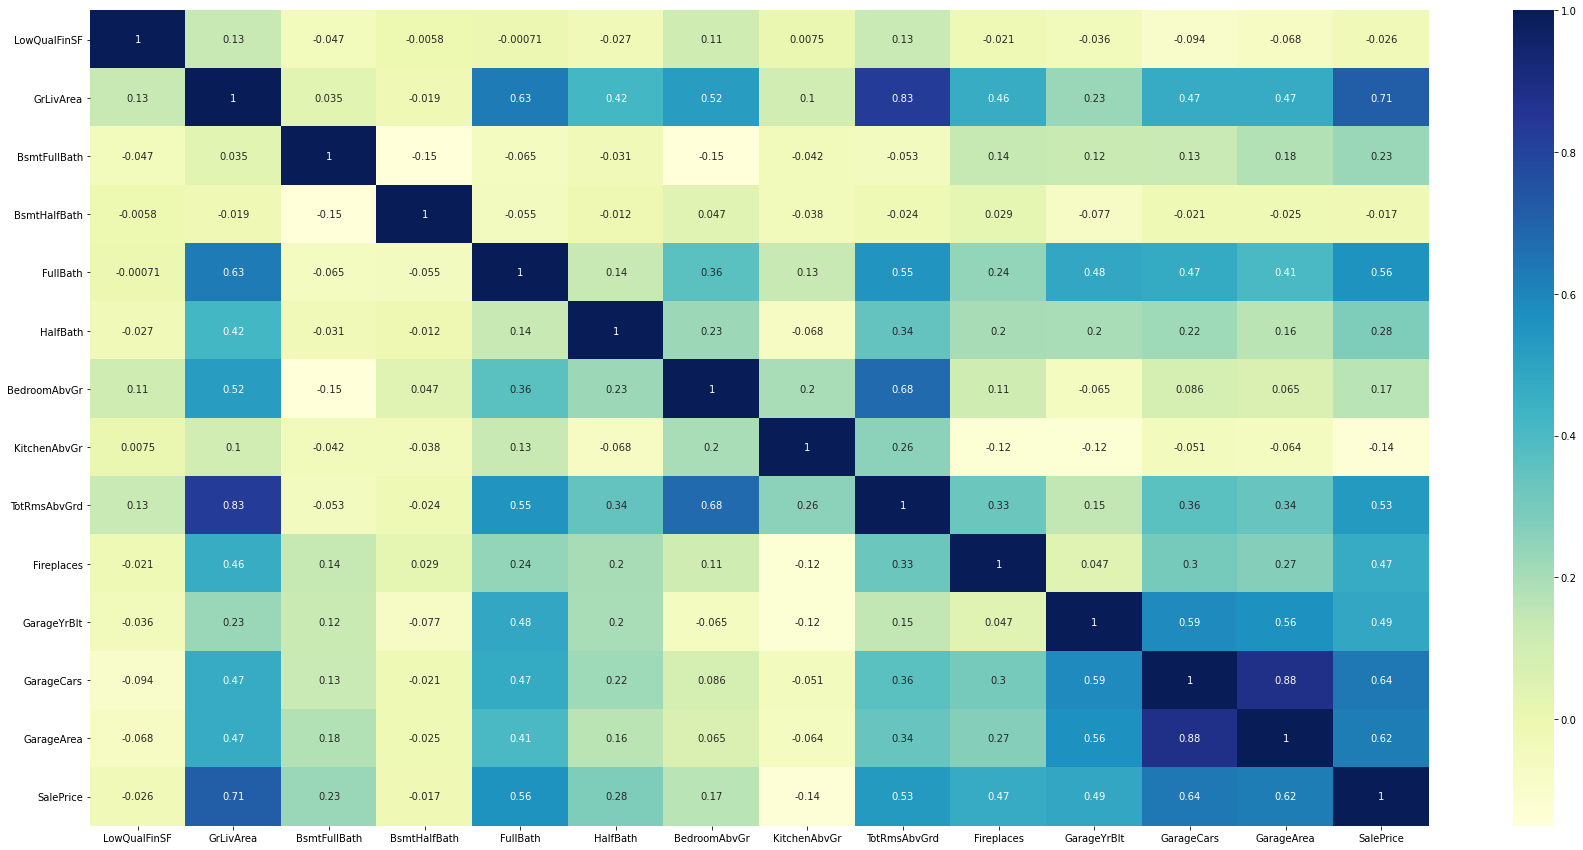

In [16]:
#Heatmap to find correlation of each variable with 'SalePrice'
plt.figure(figsize = (30, 15))
sns.heatmap(subdf2.corr(), annot = True, cmap="YlGnBu")
plt.show()

After analyzing correlation of variables for subpart-2, we found following observations:
- 'GrLivArea', 'GarageCars', 'GarageArea' are the top highly correlated features with the target variable 'SalePrice'.
- 'FullBath', 'TotRmsAbvGrd', 'Fireplaces' and 'GarageYrBlt' are the next set of variables with good correlation with the target.

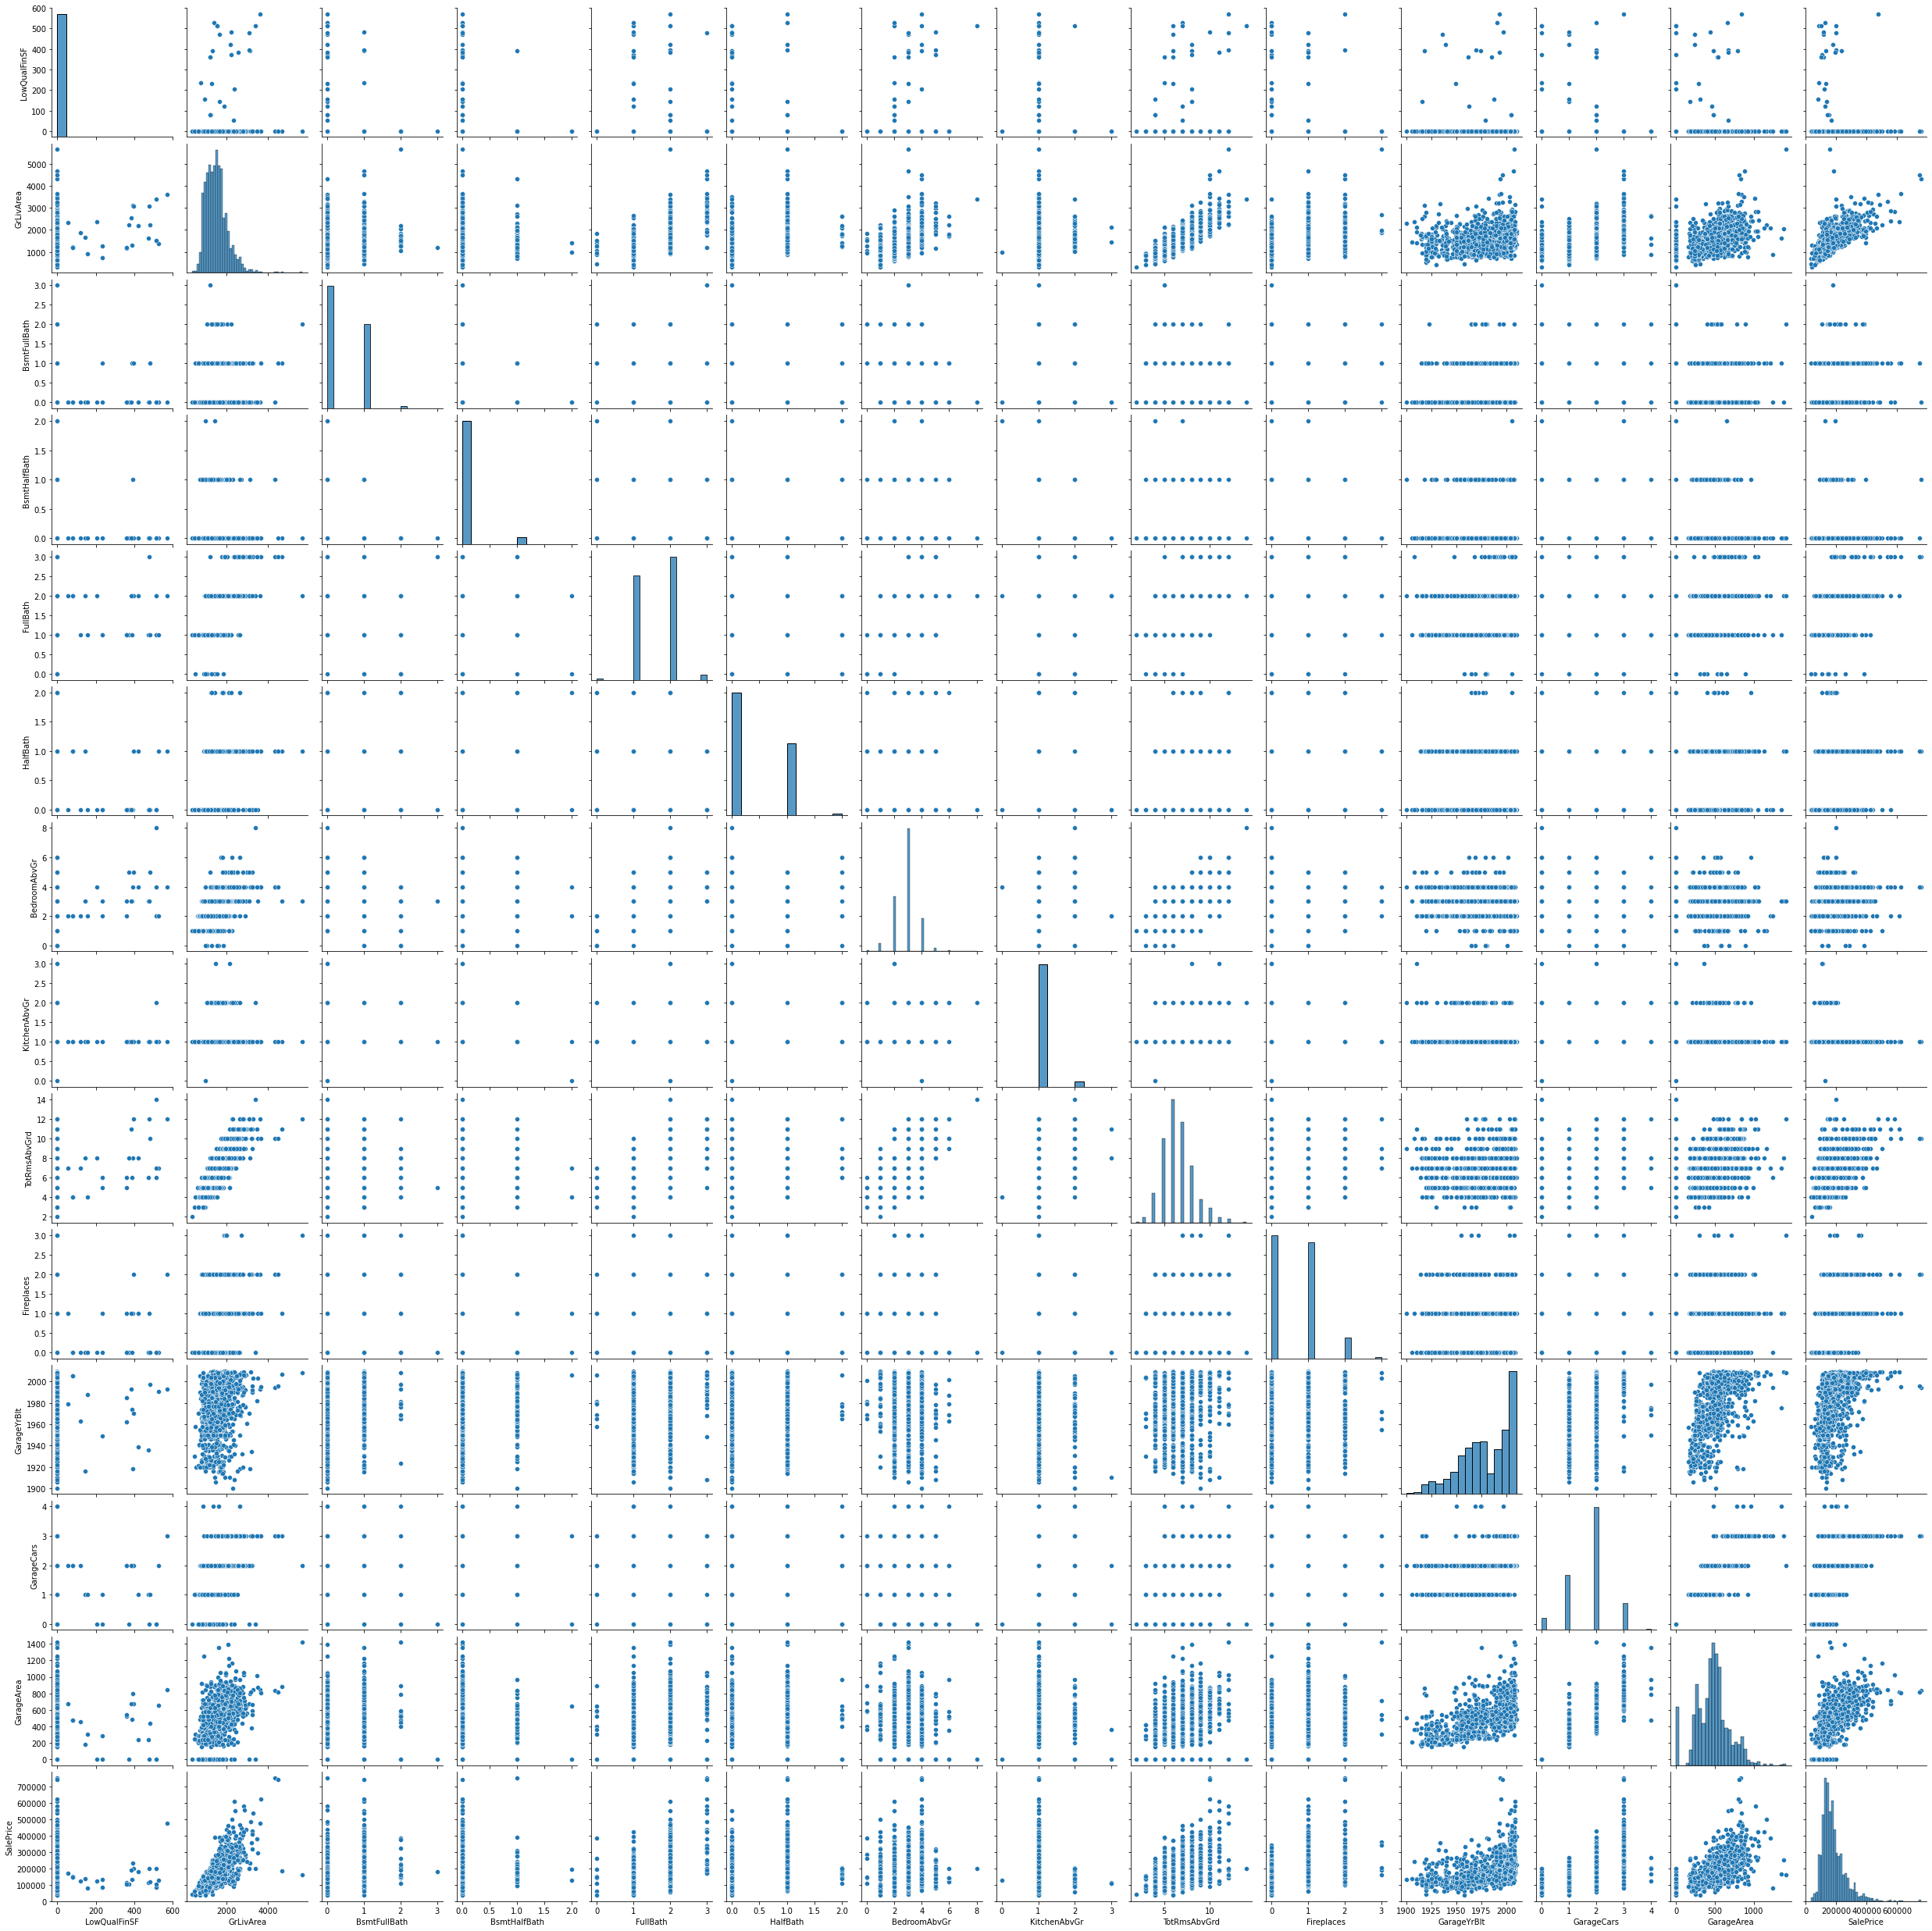

In [17]:
#Analzying relationship between variables using sub-parts of the data frame
sns.pairplot(subdf2)
plt.show()

After analyzing pairplot of variables for subpart-2, we found following observations:
- 'GrLivArea', 'GarageCars', 'GarageArea' have a good linear relationship with the target variable 'SalePrice'.
- 'FullBath', 'TotRmsAbvGrd' and 'GarageYrBlt' have a good linear relationship with good correlation with the target.

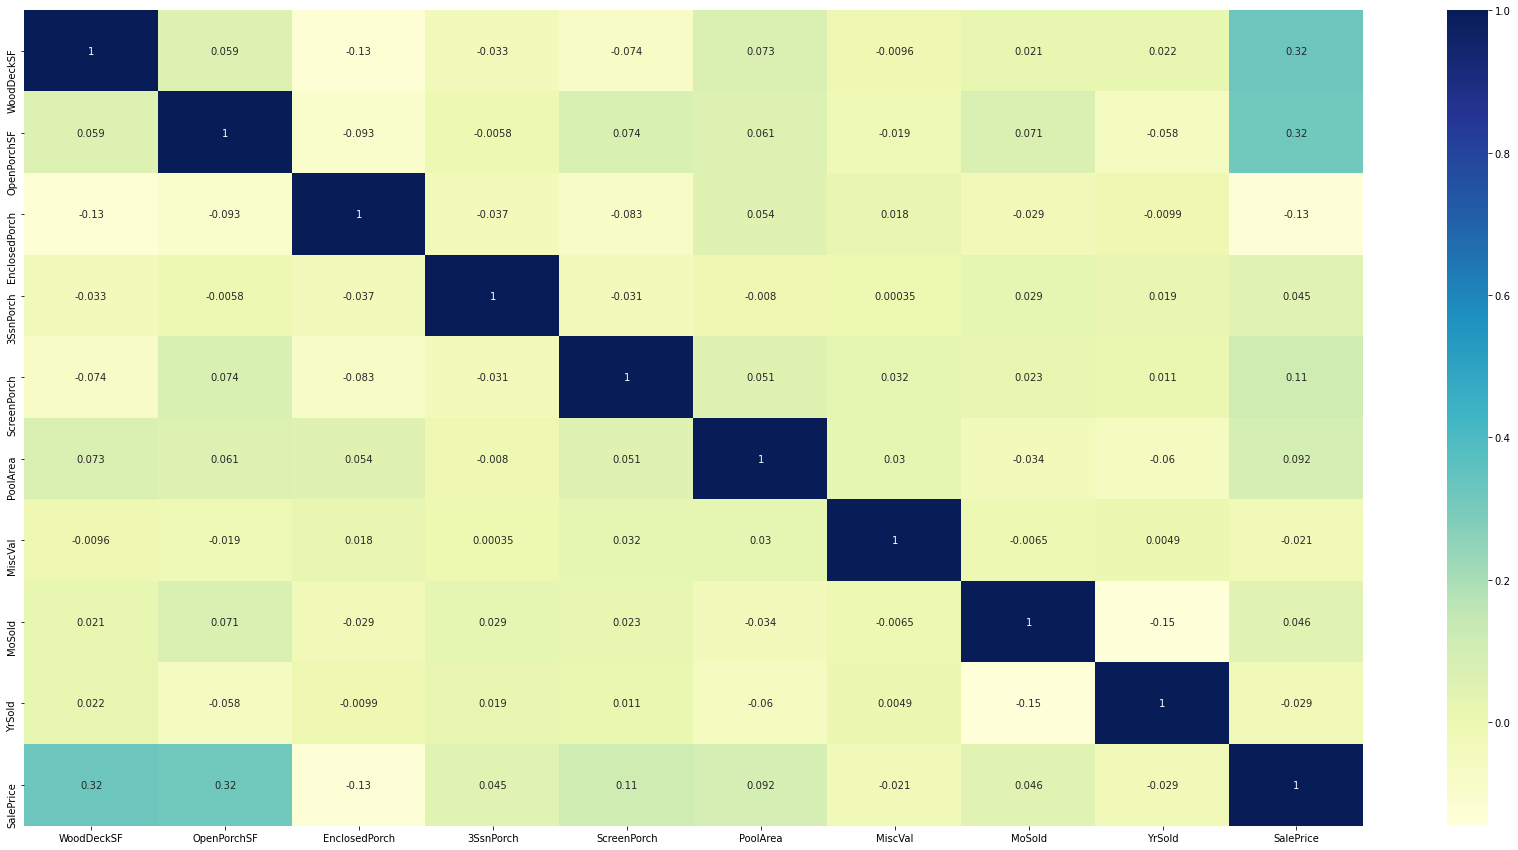

In [18]:
#Heatmap to find correlation of each variable with 'SalePrice'
plt.figure(figsize = (30, 15))
sns.heatmap(subdf3.corr(), annot = True, cmap="YlGnBu")
plt.show()

After analyzing correlation of variables for subpart-3, we found following observations:
- Variables 'WoodDeckSF' and 'OpenPorchSF' show slight correlation with the target variable 'SalePrice'.

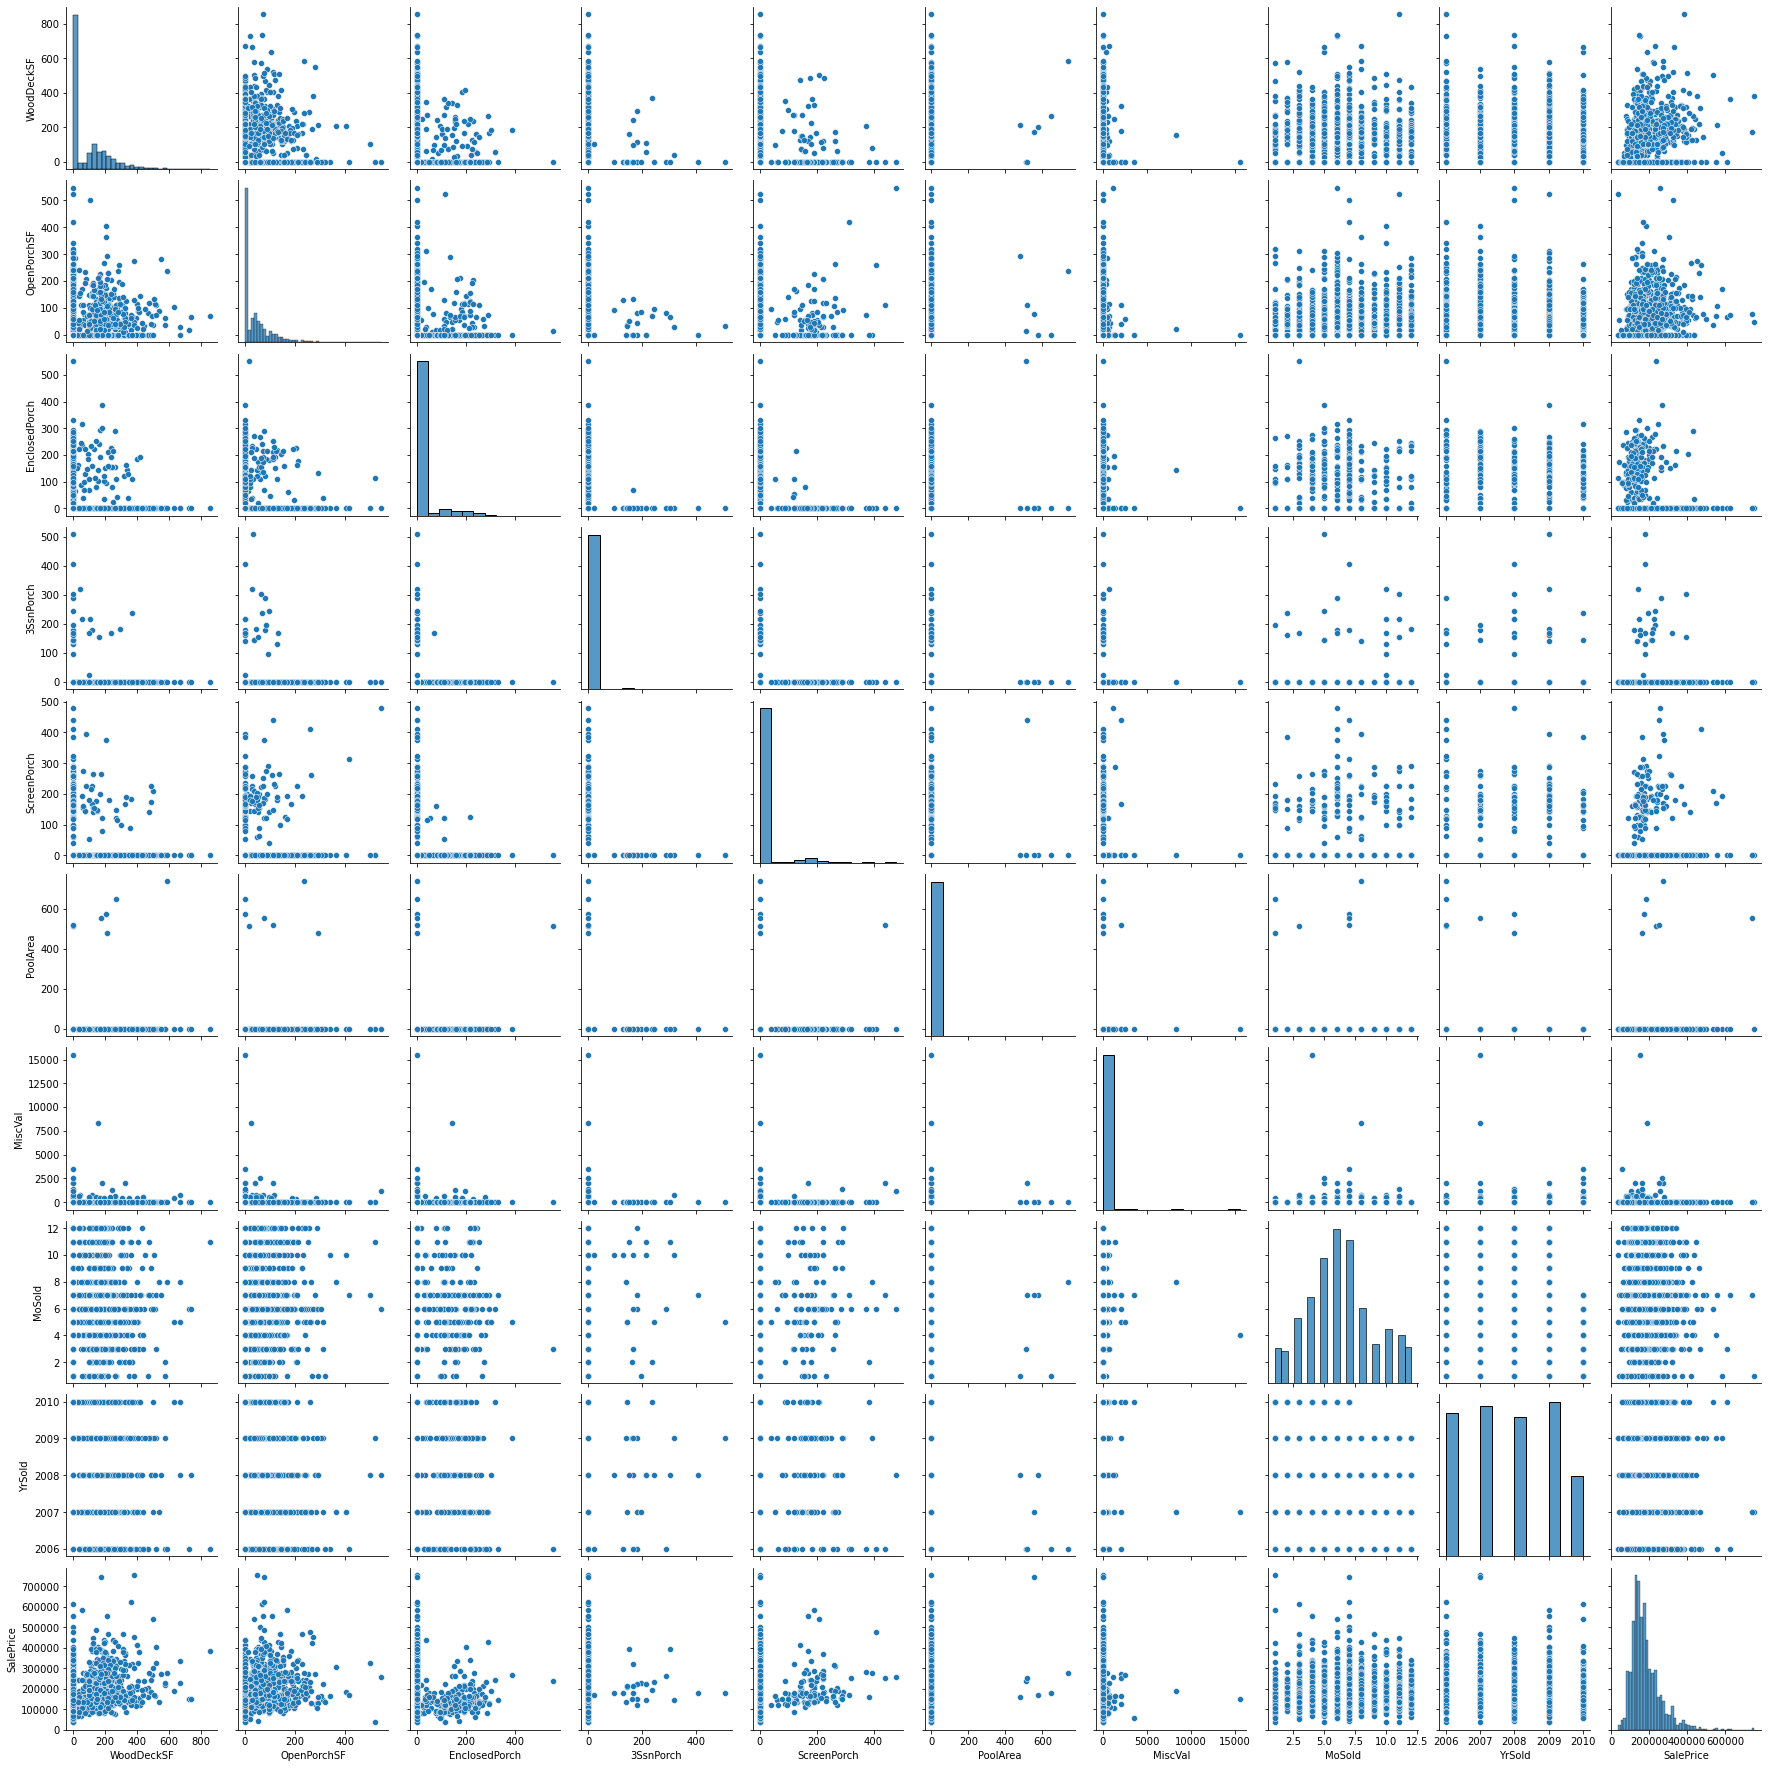

In [19]:
#Analzying relationship between variables using sub-parts of the data frame
sns.pairplot(subdf3)
plt.show()

After analyzing pairplot of variables for subpart-3, we found following observations:
- 'WoodDeckSF', 'OpenPorch', 'EnclosedPorch' have a slight linear relationship with the target variable 'SalePrice'.

### Conclusions from the analysis

From the above observations we can conlcude that the following variables can be among the top predictor variables:
- 'OverallQual'
- 'TotalBsmtSF'
- '1stFlrSF'
- 'GrLivArea'
- 'GarageCars'
- 'GarageArea'
- 'YearBuilt'
- 'YearRemodAdd'
- 'MasVnrArea'
- 'FullBath'
- 'TotRmsAbvGrd'

In [20]:
#Finding percent of missing values
round(100*(df.isnull().sum().sort_values(ascending=False).head(20)/len(df.index)), 2)

GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
YearRemodAdd    0.00
ExterQual       0.00
ExterCond       0.00
Exterior2nd     0.00
Exterior1st     0.00
Foundation      0.00
BsmtFinSF1      0.00
dtype: float64

In [21]:
#Checking the maximum number of null or missing values
df.isnull().sum().sort_values(ascending=False).head(15)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
YearRemodAdd     0
ExterQual        0
dtype: int64

In [22]:
#As we saw from earlier analysis that garage related variables are among the top predictor variables.
#Hence we look the data for which we are getting null for this type.
df[df['GarageType'].isnull()]

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
39            90       RL     6040   Pave      Reg         Lvl    AllPub   
48           190       RM     4456   Pave      Reg         Lvl    AllPub   
78            90       RL    10778   Pave      Reg         Lvl    AllPub   
88            50  C (all)     8470   Pave      IR1         Lvl    AllPub   
89            20       RL     8070   Pave      Reg         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1349          70       RM     5250   Pave      Reg         Lvl    AllPub   
1407          20       RL     8780   Pave      IR1         Lvl    AllPub   
1449         180       RM     1533   Pave      Reg         Lvl    AllPub   
1450          90       RL     9000   Pave      Reg         Lvl    AllPub   
1453          20       RL    17217   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
39      Inside       Gtl      Edwards       Norm       Norm   Duplex   
48      Inside       Gtl      OldTown       Norm       Norm   2fmCon   
78      Inside       Gtl       Sawyer       Norm       Norm   Duplex   
88      Corner       Gtl       IDOTRR      Feedr      Feedr     1Fam   
89      Inside       Gtl      CollgCr       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1349    Inside       Gtl      OldTown       Norm       Norm     1Fam   
1407    Corner       Gtl      Mitchel       Norm       Norm     1Fam   
1449    Inside       Gtl      MeadowV       Norm       Norm    Twnhs   
1450       FR2       Gtl        NAmes       Norm       Norm   Duplex   
1453    Inside       Gtl      Mitchel       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
39       1Story            4            5       1955          1955     Gable   
48       2Story            4            5       1920          2008     Gable   
78       1Story            4            5       1968          1968       Hip   
88       1.5Fin            3            2       1915          1982       Hip   
89       1Story            4            5       1994          1995     Gable   
...         ...          ...          ...        ...           ...       ...   
1349     2Story            8            5       1872          1987     Gable   
1407     1Story            5            5       1985          1985     Gable   
1449     SFoyer            5            7       1970          1970     Gable   
1450     2Story            5            5       1974          1974     Gable   
1453     1Story            5            5       2006          2006     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
39    CompShg     AsbShng     Plywood       None         0.0        TA   
48    CompShg     MetalSd     MetalSd       None         0.0        TA   
78    CompShg     HdBoard     HdBoard       None         0.0        TA   
88    CompShg     Plywood     Plywood       None         0.0        Fa   
89    CompShg     VinylSd     VinylSd       None         0.0        TA   
...       ...         ...         ...        ...         ...       ...   
1349  CompShg     MetalSd     MetalSd       None         0.0        TA   
1407  CompShg     HdBoard     Plywood       None         0.0        TA   
1449  CompShg     CemntBd     CmentBd       None         0.0        TA   
1450  CompShg     VinylSd     VinylSd       None         0.0        TA   
1453  CompShg     VinylSd     VinylSd       None         0.0        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
39          TA      PConc      NaN      NaN          NaN          NaN   
48          TA     BrkTil       TA       TA           No          Unf   
78          TA     CBlock       TA       TA           No          Unf   
88          Fa     CBlock       TA       Fa           No          Unf   
89          T

In [23]:
#Checking data values for variable 'GarageYrBlt'
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [24]:
#Since we have no values for so many garage fields for the same rows, we can impute it with no garage field 'NA'
#Also since variable 'GarageYrBlt' is a numeric field, we will impute it with '0' for values with no garage.
df['GarageType'] = df['GarageType'].fillna('NA')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('0')
df['GarageFinish'] = df['GarageFinish'].fillna('NA')
df['GarageCond'] = df['GarageCond'].fillna('NA')
df['GarageQual'] = df['GarageQual'].fillna('NA')

In [25]:
#Checking the number of null or missing values
df.isnull().sum().sort_values(ascending=False).head(15)

BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtFinType1    37
BsmtCond        37
MasVnrType       8
MasVnrArea       8
Electrical       1
ExterQual        0
Exterior1st      0
Exterior2nd      0
SalePrice        0
ExterCond        0
Foundation       0
RoofStyle        0
dtype: int64

In [26]:
#Looking into the data for which we are getting null for this type.
df[df['BsmtFinType1'].isnull()]

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
17            90       RL    10791   Pave      Reg         Lvl    AllPub   
39            90       RL     6040   Pave      Reg         Lvl    AllPub   
90            20       RL     7200   Pave      Reg         Lvl    AllPub   
102           90       RL     7018   Pave      Reg         Bnk    AllPub   
156           20       RL     7200   Pave      Reg         Lvl    AllPub   
182           20       RL     9060   Pave      Reg         Lvl    AllPub   
259           20       RM    12702   Pave      Reg         Lvl    AllPub   
342           90       RL     8544   Pave      Reg         Lvl    AllPub   
362           85       RL     7301   Pave      Reg         Lvl    AllPub   
371           50       RL    17120   Pave      Reg         Lvl    AllPub   
392           20       RL     8339   Pave      IR1         Lvl    AllPub   
520          190       RL    10800   Pave      Reg         Lvl    AllPub   
532           20       RL     7200   Pave      Reg         Lvl    AllPub   
533           20       RL     5000   Pave      Reg         Low    AllPub   
553           20       RL     8777   Pave      Reg         Lvl    AllPub   
646           20       RL     7200   Pave      Reg         Lvl    AllPub   
705          190       RM     5600   Pave      Reg         Lvl    AllPub   
736           90       RL     8544   Pave      Reg         Lvl    AllPub   
749           50       RL     8405   Pave      Reg         Lvl    AllPub   
778           90       RH     8400   Pave      Reg         Lvl    AllPub   
868           60       RL    14762   Pave      IR2         Lvl    AllPub   
894           90       RL     7018   Pave      Reg         Bnk    AllPub   
897           90       RL     7018   Pave      Reg         Lvl    AllPub   
984           90       RL    10125   Pave      Reg         Lvl    AllPub   
1000          20       RL    10206   Pave      Reg         Lvl    AllPub   
1011          90       RL     9825   Pave      Reg         Lvl    AllPub   
1035          20       RL    11500   Pave      IR1         Lvl    AllPub   
1045          20       RL    13680   Pave      IR1         Lvl    AllPub   
1048          20       RL    21750   Pave      Reg         Lvl    AllPub   
1049          20       RL    11100   Pave      Reg         Low    AllPub   
1090          90       RL     8544   Pave      Reg         Lvl    AllPub   
1179          20       RL     8335   Pave      Reg         Lvl    AllPub   
1216          90       RM     8930   Pave      Reg         Lvl    AllPub   
1218          50       RM     6240   Pave      Reg         Lvl    AllPub   
1232          90       RL     9842   Pave      Reg         Lvl    AllPub   
1321          20       RL     6627   Pave      IR1         Lvl    AllPub   
1412          90       RL     7200   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
17      Inside       Gtl       Sawyer       Norm       Norm   Duplex   
39      Inside       Gtl      Edwards       Norm       Norm   Duplex   
90      Inside       Gtl        NAmes       Norm       Norm     1Fam   
102     Inside       Gtl      SawyerW       Norm       Norm   Duplex   
156     Inside       Gtl        NAmes       Norm       Norm     1Fam   
182     Inside       Gtl      Edwards     Artery       Norm     1Fam   
259     Inside       Gtl      OldTown       Norm       Norm     1Fam   
342     Inside       Gtl        NAmes       Norm       Norm   Duplex   
362     Corner       Gtl      Edwards       Norm       Norm     1Fam   
371     Inside       Gtl      ClearCr      Feedr       Norm     1Fam   
392     Inside       Gtl        NAmes       Norm       Norm     1Fam   
520     Inside       Gtl      OldTown       Norm       Norm   2fmCon   
532     Inside       Gtl        NAmes       Norm       Norm     1Fam   
533     Inside       Mod      BrkSide       Norm       Norm     1Fam   
553     Inside       Gtl      Edwards

In [27]:
#Since we have no values for so many Basement fields for the same rows, we can impute it with no basement field 'NA'
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
df['BsmtQual'] = df['BsmtQual'].fillna('NA')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
df['BsmtCond'] = df['BsmtCond'].fillna('NA')

In [28]:
#Checking the number of null or missing values
df.isnull().sum().sort_values(ascending=False).head()

MasVnrType    8
MasVnrArea    8
Electrical    1
SalePrice     0
Foundation    0
dtype: int64

In [29]:
df[df['MasVnrType'].isnull()]

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
234           60       RL     7851   Pave      Reg         Lvl    AllPub   
529           20       RL    32668   Pave      IR1         Lvl    AllPub   
650           60       FV     8125   Pave      Reg         Lvl    AllPub   
936           20       RL    10083   Pave      Reg         Lvl    AllPub   
973           20       FV    11639   Pave      Reg         Lvl    AllPub   
977          120       FV     4274   Pave      IR1         Lvl    AllPub   
1243          20       RL    13891   Pave      Reg         Lvl    AllPub   
1278          60       RL     9473   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
234     Inside       Gtl      Gilbert       Norm       Norm     1Fam   
529    CulDSac       Gtl      Crawfor       Norm       Norm     1Fam   
650     Inside       Gtl      Somerst       Norm       Norm     1Fam   
936     Inside       Gtl      SawyerW       Norm       Norm     1Fam   
973     Corner       Gtl      Somerst       Norm       Norm     1Fam   
977     Inside       Gtl      Somerst       Norm       Norm   TwnhsE   
1243    Inside       Gtl      NridgHt       Norm       Norm     1Fam   
1278    Inside       Gtl      CollgCr       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
234      2Story            6            5       2002          2002     Gable   
529      1Story            6            3       1957          1975       Hip   
650      2Story            7            6       2007          2007     Gable   
936      1Story            7            5       2003          2003     Gable   
973      1Story            7            5       2007          2008     Gable   
977      1Story            7            5       2006          2007     Gable   
1243     1Story           10            5       2006          2006     Gable   
1278     2Story            8            5       2002          2002     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
234   CompShg     VinylSd     VinylSd        NaN         NaN        Gd   
529   CompShg     Wd Sdng       Stone        NaN         NaN        Gd   
650   CompShg     CemntBd     CmentBd        NaN         NaN        Gd   
936   CompShg     VinylSd     VinylSd        NaN         NaN        Gd   
973   CompShg     CemntBd     CmentBd        NaN         NaN        Gd   
977   CompShg     VinylSd     VinylSd        NaN         NaN        Gd   
1243  CompShg     VinylSd     VinylSd        NaN         NaN        Ex   
1278  CompShg     VinylSd     VinylSd        NaN         NaN        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
234         TA      PConc       Gd       TA           No          GLQ   
529         TA      PConc       TA       TA           No          Rec   
650         TA      PConc       Gd       TA           No          Unf   
936         TA      PConc       Gd       TA           No          GLQ   
973         TA      PConc       Gd       TA           No          Unf   
977         TA      PConc       Gd       TA           No          GLQ   
1243        TA      PConc       Ex       Gd           Gd          GLQ   
1278        TA      PConc       Gd       TA           No          GLQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
234          625          Unf           0        235          860    GasA   
529         1219          Unf           0        816         2035    GasA   
650            0          Unf           0        813          813    GasA   
936          833          Unf           0        343         1176    GasA   
973            0          Unf           0       1428         1428    GasA   
977         1106          Unf           0        135         1241    GasA   
1243        1386          Unf           0        690         2076    GasA   
1278      

In [30]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [31]:
df.MasVnrArea.value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [32]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [33]:
#Since we have no values for Masonry veneer fields for the same rows, we can impute it with no masonry field 'None' and '0.0', which is also the mode here.
#For Electrical, there is just one null value which we can impute with the maximum occurred value.
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [34]:
#Checking the number of null or missing values
df.isnull().sum().sort_values(ascending=False).head()

SalePrice      0
RoofStyle      0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
dtype: int64

In [35]:
#Checking the data columns and rows after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

## Univariate and Bivariate analysis

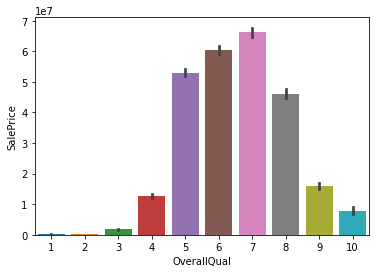

In [36]:
#The highest Sale Price was for the houses having Overall Quality rating as 7,6,5 and 8.
sns.barplot(x='OverallQual', y='SalePrice', data=df, estimator=sum)
plt.show()

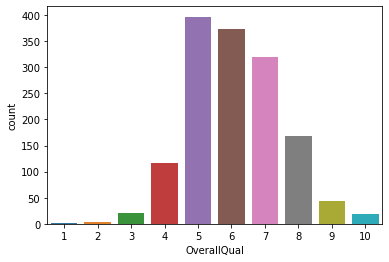

In [37]:
#Most houses were sold having Overall Quality rating as '5,6,7 and 8'
sns.countplot(x="OverallQual", data=df)
plt.show()

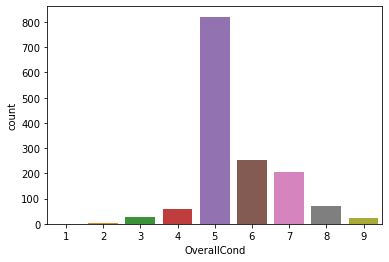

In [38]:
#Houses having Overall Condition rating as '5' were sold most
sns.countplot(x="OverallCond", data=df)
plt.show()

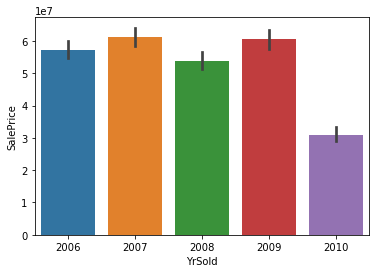

In [39]:
#The Least number of houses were sold in the year 2010
sns.barplot(x='YrSold', y='SalePrice', data=df, estimator=sum)
plt.show()

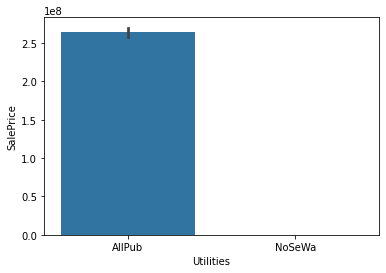

In [40]:
#Houses having all public Utilities available are sold most and also most houses have all the utilities made available.
#This field has just one value which will not provide much insight, hence we can drop this.
sns.barplot(x='Utilities', y='SalePrice', data=df, estimator=sum)
plt.show()

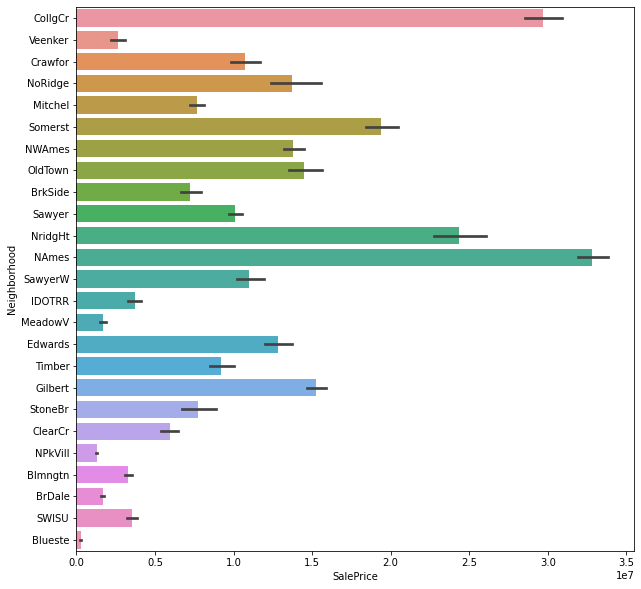

In [41]:
#Highest Sale Price was for the houses having Neighbourhood as 'North Ames', 'College Creek'.'Northridge Heights' and 'Somerset'
plt.figure(figsize=(10,10))
sns.barplot(y='Neighborhood', x='SalePrice', data=df, estimator=sum)
plt.show()

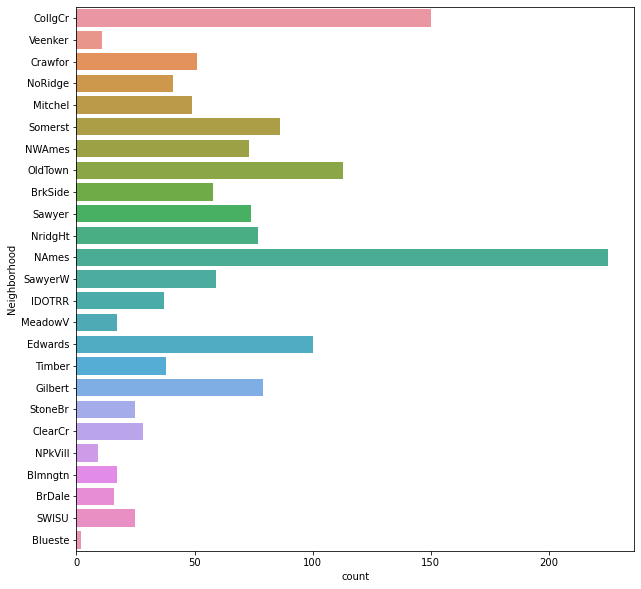

In [42]:
#Whereas most houses were sold having Neighbourhood as 'North Ames', 'College Creek'.'Old Town' and 'Edwards'
plt.figure(figsize=(10,10))
sns.countplot(y="Neighborhood", data=df)
plt.show()

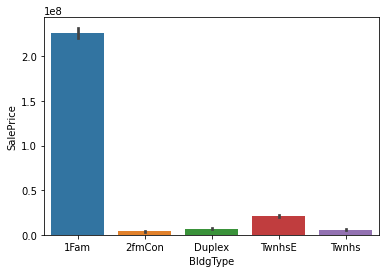

In [43]:
#Building type with dwelling for Single-family is sold most
sns.barplot(x='BldgType', y='SalePrice', data=df, estimator=sum)
plt.show()

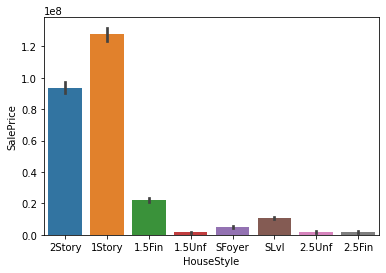

In [44]:
#House type with dwelling with One and two story is sold most
sns.barplot(x='HouseStyle', y='SalePrice', data=df, estimator=sum)
plt.show()

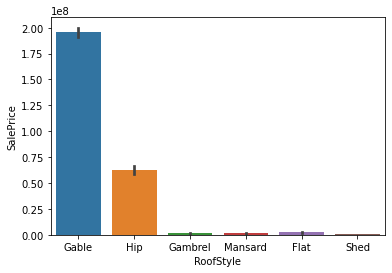

In [45]:
#Houses with Roof Style as 'Gable' is sold most, followed by houses having roof style as 'Hip'
sns.barplot(x='RoofStyle', y='SalePrice', data=df, estimator=sum)
plt.show()

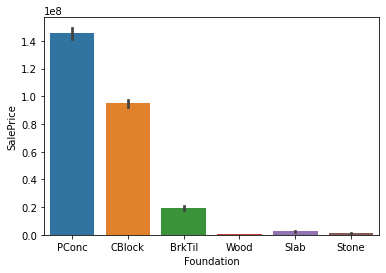

In [46]:
#Houses built on Foundation 'Poured Contrete' is sold with highest Sale Price, followed by houses with foundation of 'Cinder Block'
sns.barplot(x='Foundation', y='SalePrice', data=df, estimator=sum)
plt.show()

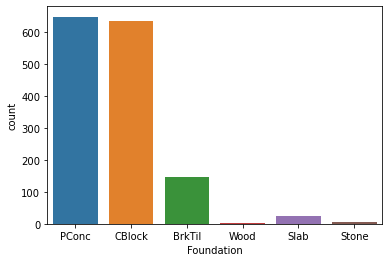

In [47]:
#Although Sale Price might be higher for houses with foundation as 'Poured Contrete'
#But the number of houses sold are almost equal for foundation 'Poured Contrete' and 'Cinder Block'
sns.countplot(x="Foundation", data=df)
plt.show()

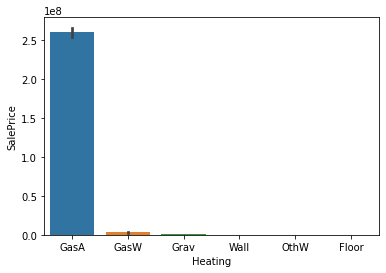

In [48]:
#Houses with Heating available through Gas forced warm air furnace is in higher demand compared to other heating techniques.
sns.barplot(x='Heating', y='SalePrice', data=df, estimator=sum)
plt.show()

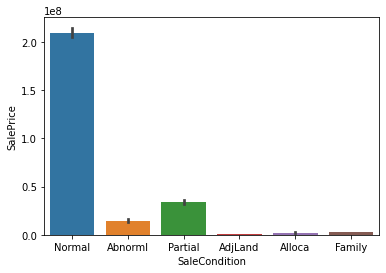

In [49]:
#Houses with Normal Sale Condition are sold more.
sns.barplot(x='SaleCondition', y='SalePrice', data=df, estimator=sum)
plt.show()

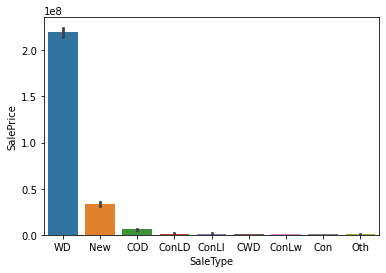

In [50]:
#Houses with Sale Type as Warranty Deed - Conventional are in high demand
sns.barplot(x='SaleType', y='SalePrice', data=df, estimator=sum)
plt.show()

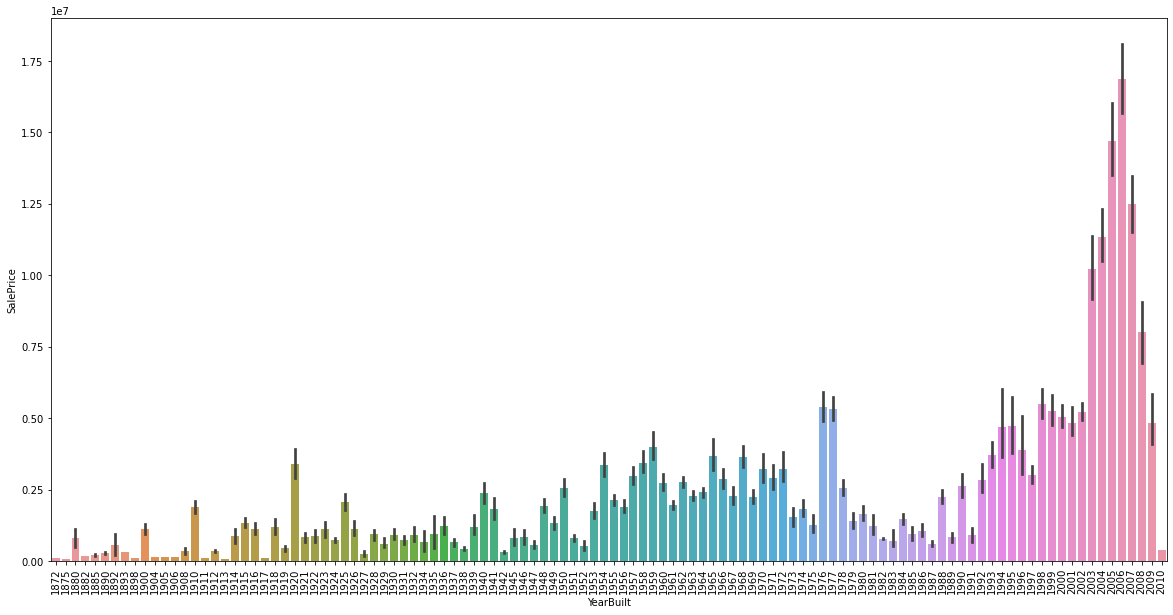

In [51]:
#We can see very less number of houses were built in 2010, hence explaining the low number of houses sold in that year.
#Although the decade before 2010 shows that many houses were built during that period (1998-2009)
plt.figure(figsize=(20,10))
plot=sns.barplot(x='YearBuilt', y='SalePrice', data=df, estimator=sum)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

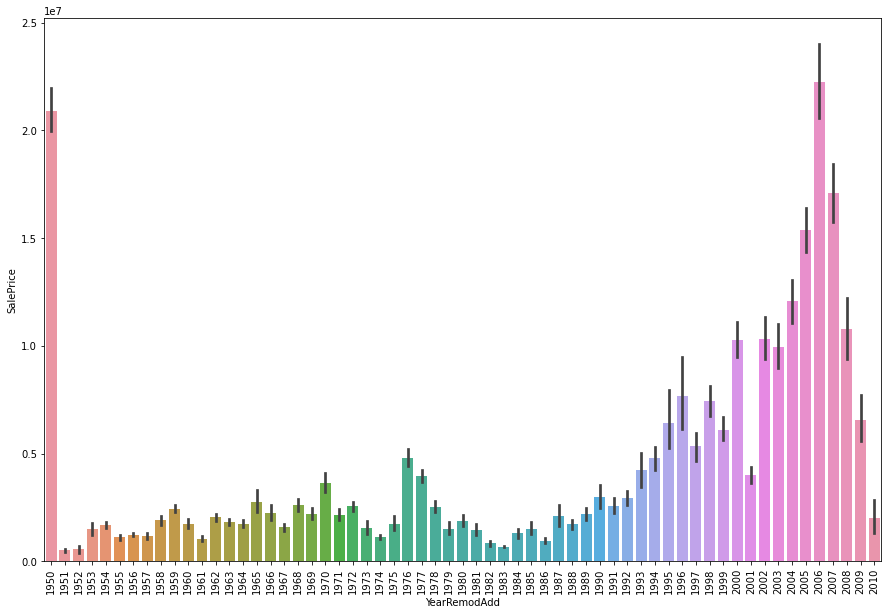

In [52]:
# Most houses were remodelled or constructed in the years 1950 and 2006
plt.figure(figsize=(15,10))
plot=sns.barplot(x='YearRemodAdd', y='SalePrice', data=df, estimator=sum)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

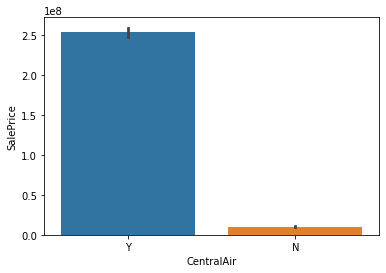

In [53]:
#Houses have Central Air conditioning available are sold most
sns.barplot(x='CentralAir', y='SalePrice', data=df, estimator=sum)
plt.show()

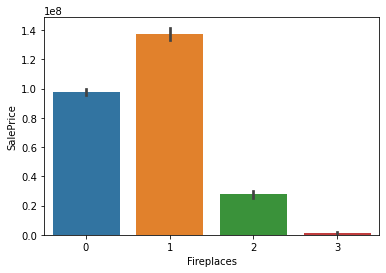

In [54]:
#Houses having 1 Fireplace are sold with higher Sale Price compared to houses having no fireplace.
sns.barplot(x='Fireplaces', y='SalePrice', data=df, estimator=sum)
plt.show()

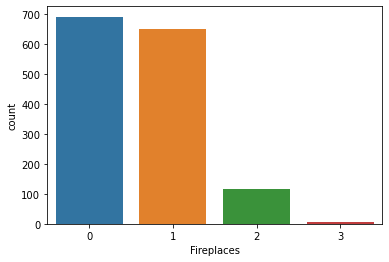

In [55]:
#But the houses with no fireplace are sold slightly more number of times than the ones with 1 fireplace.
sns.countplot(x="Fireplaces", data=df)
plt.show()

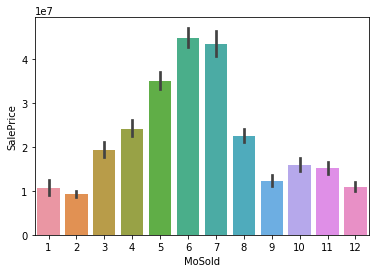

In [56]:
#Most of the houses are sold the month of June and July
sns.barplot(x='MoSold', y='SalePrice', data=df, estimator=sum)
plt.show()

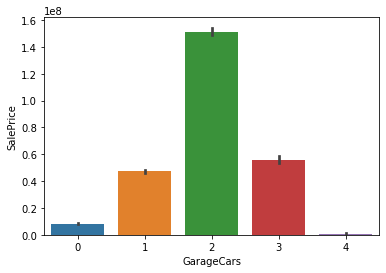

In [57]:
#Houses with Garage for 2 cars have highest Sale price followed by houses with 3 and 1 cars.
sns.barplot(x='GarageCars', y='SalePrice', data=df, estimator=sum)
plt.show()

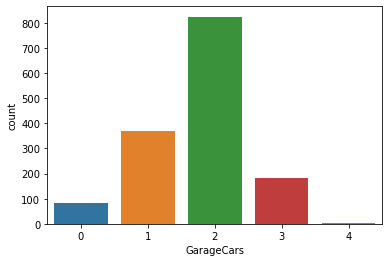

In [58]:
#But the sale is more for houses with Garage for 2 or 1 cars, with sale being highest for 2.
sns.countplot(x="GarageCars", data=df)
plt.show()

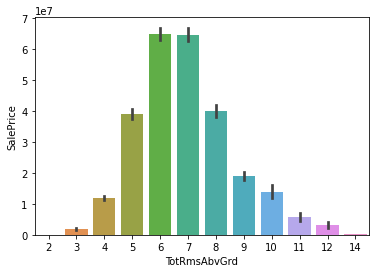

In [59]:
#Total 6 and 7 rooms above grade have highest demand
sns.barplot(x='TotRmsAbvGrd', y='SalePrice', data=df, estimator=sum)
plt.show()

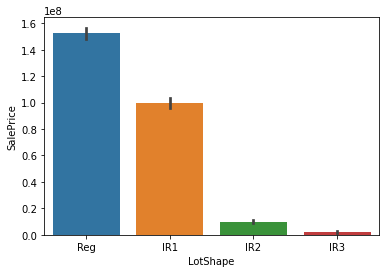

In [60]:
#Houses with General shape of property as Regular are sold most followed by slightly irregular ones.
sns.barplot(x='LotShape', y='SalePrice', data=df, estimator=sum)
plt.show()

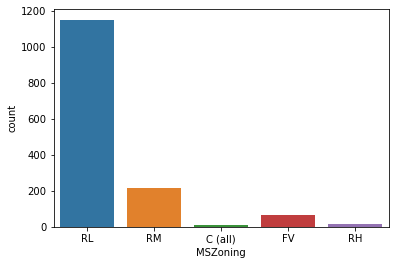

In [61]:
#Residential Low Density zones are in higher demand
sns.countplot(x="MSZoning", data=df)
plt.show()

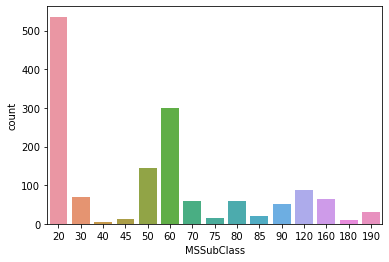

In [62]:
#1-STORY 1946 & NEWER ALL STYLES type of dwelling are sold most
sns.countplot(x="MSSubClass", data=df)
plt.show()

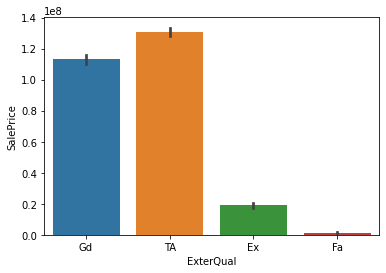

In [63]:
#Average and Good Exterior quality houses are in higer demand.
sns.barplot(x='ExterQual', y='SalePrice', data=df, estimator=sum)
plt.show()

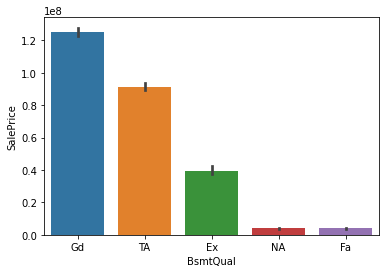

In [64]:
#Houses wih Good and Average Basement quality are sold at higher Sale Price, with Good being the preferred one.
sns.barplot(x='BsmtQual', y='SalePrice', data=df, estimator=sum)
plt.show()

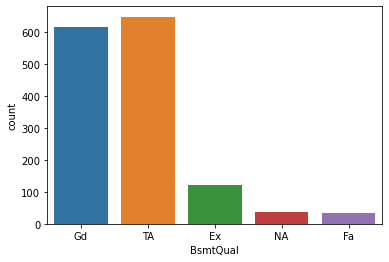

In [65]:
#But the number of houses sold are slightly higher for the Average Basement Quality
sns.countplot(x="BsmtQual", data=df)
plt.show()

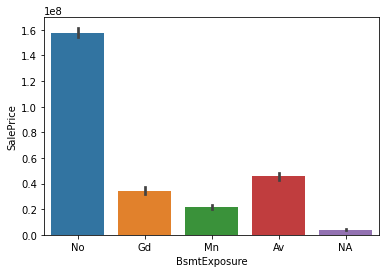

In [66]:
#Houses with No Exposure to basement are sold most
sns.barplot(x='BsmtExposure', y='SalePrice', data=df, estimator=sum)
plt.show()

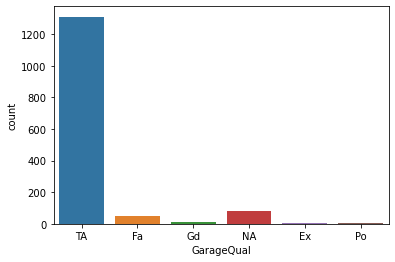

In [67]:
#Average Garage Quality is acceptable for most people
sns.countplot(x="GarageQual", data=df)
plt.show()

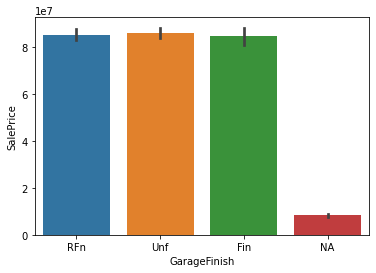

In [68]:
#Houses having a garage are sold at a higher price than those having no garage at all
sns.barplot(x='GarageFinish', y='SalePrice', data=df, estimator=sum)
plt.show()

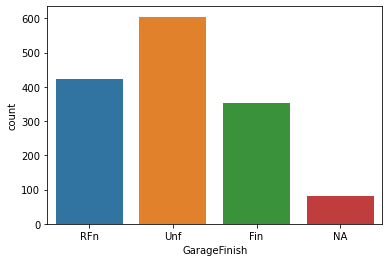

In [69]:
#The sale is higher for unfinished garages more.
sns.countplot(x="GarageFinish", data=df)
plt.show()

Skew:1.8828757597682129


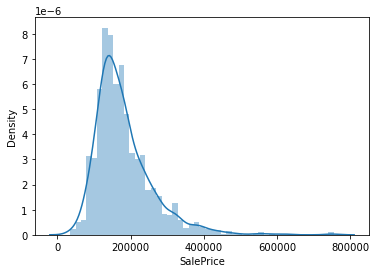

In [70]:
#Checking distribution trend of the target variable SalePrice
sns.distplot(df['SalePrice'])
print('Skew:'+ str((df['SalePrice']).skew()))
plt.show()

Skew:0.12133506220520406


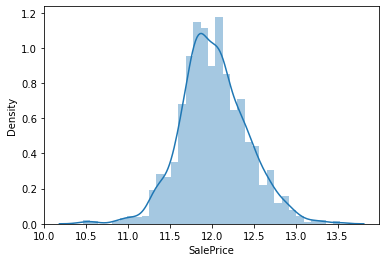

In [71]:
#Here Skew of target variable is more than 1, which shows it is highly skewed.
#Hence we transform this using log transform, which makes it closely normalized.
df['SalePrice']=np.log(df['SalePrice'])

sns.distplot(df['SalePrice'])
print('Skew:'+ str((df['SalePrice']).skew()))
plt.show()

####  Conclusion from univariate and bivariate analysis shows that majority of house buying population opt for houses having basic or average amenities and facilities over grandeur. As the facilities improves, the sale price increases.
Also as the target data was skewed, we have normalized it for our analysis.

## Derived variables

In [72]:
#Deriving new variable HouseAge using sold and remodelled year
#Also dropping these along with Utilities, which just has 1 value throughout and won't help in analysis
df['HouseAge']=df['YrSold']-df['YearRemodAdd']
df = df.drop(['YrSold','YearRemodAdd','Utilities'],axis=1)
df.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour LotConfig  \
0          60       RL     8450   Pave      Reg         Lvl    Inside   
1          20       RL     9600   Pave      Reg         Lvl       FR2   
2          60       RL    11250   Pave      IR1         Lvl    Inside   
3          70       RL     9550   Pave      IR1         Lvl    Corner   
4          60       RL    14260   Pave      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt RoofStyle RoofMatl Exterior1st  \
0            7            5       2003     Gable  CompShg     VinylSd   
1            6            8       1976     Gable  CompShg     MetalSd   
2            7            5       2001     Gable  CompShg     VinylSd   
3            7            5       1915     Gable  CompShg     Wd Sdng   
4            8            5       2000     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces GarageType GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0           0     Attchd        2003          RFn           2         548   
1           1     Attchd        1976          RFn           2         460   
2           1     Attchd        2001          RFn           2         608   
3           1     Detchd   

## Mapping variables

In [73]:
#Mapping various categorical variables for analysis
df['MSZoning'] = df[['MSZoning']].apply(lambda x: x.map({'A': 'Agriculture', 'C': 'Commercial','FV': 'FloatVillage', 'I': 'Industrial', 
                                                         'RH': 'ResiHigh', 'RL': 'ResiLow','RP': 'ResiPark', 'RM': 'ResiMed' }))

df['PavedDrive'] = df[['PavedDrive']].apply(lambda x: x.map({'Y': 'Paved', 'P': 'PartPaved', 'N': 'Dirt_Gravel' }))

df['MSSubClass'] = df[['MSSubClass']].apply(lambda x: x.map({'20': '1S_1946', '30': '1S_1945', '40': '1S_FinAttic_All',
                                                            '45': '1S_Unfin_All', '50': '1S_Fin_All', '60': '2S_1946',
                                                            '70': '2S_1945', '75': '2S_All', '80': 'Split_MulLvl',
                                                            '85': 'Split_Foyer', '90': 'Duplex_All', '120': '1S_Pud_1946',
                                                            '150': '1S_Pud_All', '160': '2S_Pud_1946', '180': 'PUD', 
                                                             '190': '2Famly'}))

df['OverallQual'] = df[['OverallQual']].apply(lambda x: x.map({'10': 'Very Excellent', '9': 'Excellent', '8': 'VeryGood', 
                                                               '7': 'Good', '6': 'AboveAverage', '5': 'Average', 
                                                               '4': 'BelowAverage', '3': 'Fair','2': 'Poor', '1': 'Very Poor'}))

df['OverallCond'] = df[['OverallCond']].apply(lambda x: x.map({'10': 'Very Excellent', '9': 'Excellent', '8': 'VeryGood', 
                                                               '7': 'Good', '6': 'AboveAverage', '5': 'Average', 
                                                               '4': 'BelowAverage', '3': 'Fair','2': 'Poor', '1': 'Very Poor'}))

## Creating Dummy Variables

In [74]:
#List of categorical variables to be used for dummy value creation
cat_vars = ['CentralAir','MSZoning', 'LotShape', 'LandContour', 'Street', 'LotConfig', 'LandSlope', 
'PavedDrive', 'BldgType', 'HouseStyle', 'Neighborhood', 'RoofStyle', 'MasVnrType', 'Foundation', 'Heating', 
'HeatingQC', 'Electrical', 'GarageType', 'GarageCond', 'SaleType', 'SaleCondition', 'Functional', 'OverallQual', 'OverallCond',
'KitchenQual', 'BsmtFinType1', 'BsmtCond', 'Exterior1st', 'ExterCond', 'Condition1', 'Condition2', 'RoofMatl','MSSubClass',
'Exterior2nd','ExterQual','BsmtFinType2','BsmtQual', 'BsmtExposure', 'GarageFinish','GarageQual']

In [75]:
#Using the categorical variables to create dummies
df = pd.get_dummies(df, columns=cat_vars, drop_first=True)

In [76]:
#Checking the newly formed dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 235 entries, LotArea to GarageQual_TA
dtypes: float64(2), int64(29), object(1), uint8(203)
memory usage: 648.8+ KB


In [77]:
#Checking the newly formed dataframe column values
df.head()

LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     8450       2003       196.0         706           0        150   
1     9600       1976         0.0         978           0        284   
2    11250       2001       162.0         486           0        434   
3     9550       1915         0.0         216           0        540   
4    14260       2000       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   
3          756       961       756             0       1717             1   
4         1145      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0        2003           2         548           0           61   
1           1        1976           2         460         298            0   
2           1        2001           2         608           0           42   
3           1        1998           3         642           0           35   
4           1        2000           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0              0          0            0         0        0       2   
1              0          0            0         0        0       5   
2              0          0            0         0        0       9   
3            272          0            0         0        0       2   
4              0          0            0         0        0      12   

   SalePrice  HouseAge  CentralAir_Y  MSZoning_ResiHigh  MSZoning_ResiLow  \
0  12.247694         5             1                  0                 1   
1  12.109011        31             1                  0                 1   
2  12.317167         6             1                  0                 1   
3  11.849398        36             1                  0                 1   
4  12.429216         8             1                  0                 1   

   MSZoning_ResiMed  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0                 0             0             0             1   
1                 0             0             0             1   
2                 0             0             0             0   
3                 0             0             0             0   
4                 0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Street_Pave  \
0                0                0                1            1   
1                0                0                1            1   
2                0                0                1            1   
3                0                0                1            1   
4                0                0                1            1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  Land

## Creating Train and Test sets for the model


In [78]:
#Specifying random seed and state to get same data rows in train and test datasets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [79]:
#Creating MinMaxScaler class object 
scaler = MinMaxScaler()

In [80]:
#Applying MinMax to all numeric variables except binary variables having values as 0 or 1
num_vars = ['LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
            'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
            'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 
            'HouseAge','GarageYrBlt', 'SalePrice']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

pd.set_option('display.max_columns', 200)
df_train.head()

LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
210   0.019306   0.384058        0.00    0.082920         0.0   0.169521   
318   0.039403   0.876812        0.16    0.174876         0.0   0.154110   
239   0.033981   0.528986        0.00    0.016655         0.0   0.274401   
986   0.017931   0.275362        0.00    0.000000         0.0   0.207620   
1416  0.046139   0.094203        0.00    0.000000         0.0   0.332620   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
210      0.141408  0.113889  0.000000           0.0   0.081860      0.333333   
318      0.220458  0.231481  0.616949           0.0   0.424289      0.333333   
239      0.120295  0.098611  0.333656           0.0   0.201576      0.000000   
986      0.079378  0.145602  0.307022           0.0   0.230015      0.000000   
1416     0.127169  0.202315  0.505569           0.0   0.355880      0.000000   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
210            0.0  0.333333       0.0         0.250           0.0   
318            0.0  0.666667       0.5         0.500           0.0   
239            0.0  0.333333       0.5         0.375           0.0   
986            0.0  0.333333       0.0         0.250           0.0   
1416           0.0  0.666667       0.0         0.500           0.5   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
210       0.181818    0.000000     0.000000        0.00    0.000000   
318       0.545455    0.333333     0.991542        0.75    0.462623   
239       0.363636    0.333333     0.969652        0.25    0.155148   
986       0.181818    0.000000     0.970149        0.25    0.179831   
1416      0.727273    0.000000     0.980597        0.50    0.394922   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
210     0.000000     0.000000       0.173913        0.0          0.0   
318     0.396733     0.114723       0.260870        0.0          0.0   
239     0.000000     0.267686       0.000000        0.0          0.0   
986     0.459743     0.000000       0.000000        0.0          0.0   
1416    0.000000     0.000000       0.206522        0.0          0.0   

      PoolArea  MiscVal    MoSold  SalePrice  HouseAge  CentralAir_Y  \
210        0.0      0.0  0.272727   0.335850  0.967213             0   
318        0.0      0.0  0.272727   0.653235  0.278689             1   
239        0.0      0.0  0.272727   0.382177  1.000000             1   
986        0.0      0.0  0.454545   0.393493  0.065574             1   
1416       0.0      0.0  0.272727   0.408435  1.000000             1   

      MSZoning_ResiHigh  MSZoning_ResiLow  MSZoning_ResiMed  LotShape_IR2  \
210                   0                 1                 0             0   
318                   0                 1                 0             0   
239                   0                 1                 0             0   
986                   0                 0                 1             0   
1416                  0                 0                 1             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
210              0             1                0                0   
318              0             1                0                1   
239              0             1                0                0   
986              0             1                0                0   
1416             0             1                0                0   

      LandContour_Lvl  Street_Pave  LotConfig_CulDSac  LotConfig_FR2  \
210                 1            1                  0              0   
318                 0            1                  0              0   
239                 1            1                  0              0   
986                 1            1                  0              0   
1416                1            1                  0              0   

      LotConfig_FR3  LotConfig_Inside 

In [81]:
#Checking scaling of all variables, they should have min as 0 and max value as 1
df_train.describe()

LotArea    YearBuilt   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.042143     0.719215     0.065306     0.079337     0.033980   
std       0.048226     0.219897     0.117088     0.082377     0.115907   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.027923     0.594203     0.000000     0.000000     0.000000   
50%       0.037531     0.731884     0.000000     0.069454     0.000000   
75%       0.046943     0.927536     0.098750     0.126152     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000   
mean      0.241388     0.173773     0.184341     0.165943      0.011649   
std       0.192066     0.075145     0.092132     0.210799      0.093608   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.092466     0.129787     0.116435     0.000000      0.000000   
50%       0.197774     0.162357     0.165278     0.000000      0.000000   
75%       0.345034     0.215057     0.243056     0.352058      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1021.000000   1021.000000   1021.000000  1021.000000  1021.000000   
mean      0.207345      0.146588      0.029873     0.522037     0.188051   
std       0.102232      0.175127      0.120615     0.183997     0.250283   
min       0.000000      0.000000      0.000000     0.000000     0.000000   
25%       0.133743      0.000000      0.000000     0.333333     0.000000   
50%       0.197540      0.000000      0.000000     0.666667     0.000000   
75%       0.255573      0.333333      0.000000     0.666667     0.500000   
max       1.000000      1.000000      1.000000     1.000000     1.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1021.000000   1021.000000   1021.000000  1021.000000  1021.000000   
mean       0.356881      0.026934      0.318315     0.199151     0.928538   
std        0.102552      0.115084      0.145956     0.215306     0.228300   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.250000      0.000000      0.181818     0.000000     0.974129   
50%        0.375000      0.000000      0.272727     0.333333     0.984080   
75%        0.375000      0.000000      0.363636     0.333333     0.995522   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1021.000000  1021.000000  1021.000000  1021.000000    1021.000000   
mean      0.442458     0.332545     0.107894     0.089690       0.042275   
std       0.187036     0.150018     0.145254     0.126502       0.114501   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.250000     0.231312     0.000000     0.000000       0.000000   
50%       0.500000     0.338505     0.000000     0.047801       0.000000   
75%       0.500000     0.406206     0.196033     0.133843       0.000000   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

         3SsnPorch  ScreenPorch     PoolArea      MiscVal       MoSold  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.007756     0.037559     0.003318     0.003143     0.480634   
std       0.063649     0.136582     0.053278     0.037314     0.249954   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.272727   
50%       0.000000     0.000000     0.000000     0.000000     0.454545   
75%       0.000000     0.000000     0.000000     0.000000     0.636364   
max       1.

In [82]:
#Checking shape of the train and test split data
print(df_train.shape)
print(df_test.shape)

(1021, 235)
(438, 235)


## Building Model using features from RFE

In [83]:
#Splitting the train dataframe to X_train and y_train 
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [84]:
#Preparing linear model for our data
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [85]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

9845962684.068502
[ 2.14244658e-01  9.57803315e-02  1.57873984e-03 -4.94695027e+11
 -1.29195689e+11 -2.04749749e+11  5.35539797e+11 -6.44463012e+11
 -3.08059287e+11 -7.68283452e+10  7.76339240e+11  4.74548340e-03
 -1.58271790e-02  1.30767822e-02  1.30920410e-02  2.23541260e-02
 -6.43539429e-02  3.81469727e-03  1.12304688e-02 -5.93436241e-01
  7.33947754e-03  9.82131958e-02  1.68190002e-02  5.09643555e-03
  1.25808716e-02  4.60062027e-02  3.87001038e-03  9.57489014e-03
  2.88772583e-03  5.88989258e-03 -4.28771973e-02  2.28729248e-02
  4.13551331e-02  4.71725464e-02  4.70733643e-02  1.34639740e-02
 -1.23901367e-02  1.09863281e-03  7.33184814e-03 -4.04357910e-03
  6.95800781e-03  3.27758789e-02  1.96075439e-03 -2.51235962e-02
 -4.32224274e-02 -6.59179688e-03  7.61032104e-03 -6.69860840e-02
  8.20922852e-03  6.82067871e-03 -7.66754150e-03 -2.01892853e-02
 -9.09042358e-03 -2.89916992e-03 -1.39331818e-03 -1.41906738e-02
 -3.79924774e-02 -9.47570801e-03 -9.93347168e-03 -7.96508789e-03
 -8.216

In [86]:
#Running RFE to get some features for our model.
#Using RFE to get top major features from so many feature list
rfe = RFE(lm, 75)             
rfe = rfe.fit(X_train, y_train)

In [87]:
#Listing all the columns chosen by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', False, 152),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 38),
 ('BsmtHalfBath', False, 133),
 ('FullBath', False, 59),
 ('HalfBath', False, 147),
 ('BedroomAbvGr', False, 71),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 150),
 ('Fireplaces', False, 41),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 93),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 14),
 ('OpenPorchSF', False, 53),
 ('EnclosedPorch', False, 98),
 ('3SsnPorch', False, 21),
 ('ScreenPorch', False, 27),
 ('PoolArea', False, 117),
 ('MiscVal', True, 1),
 ('MoSold', False, 159),
 ('HouseAge', True, 1),
 ('CentralAir_Y', True, 1),
 ('MSZoning_ResiHigh', True, 1),
 ('MSZoning_ResiLow', True, 1),
 ('MSZoning_ResiMed', True, 1),
 ('LotShape_IR2', False, 122),
 ('LotS

In [88]:
#Saving these columns to a variable
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'KitchenAbvGr', 'GarageYrBlt', 'GarageArea', 'MiscVal', 'HouseAge',
       'CentralAir_Y', 'MSZoning_ResiHigh', 'MSZoning_ResiLow',
       'MSZoning_ResiMed', 'LandSlope_Sev', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'RoofStyle_Shed', 'Foundation_Stone',
       'Foundation_Wood', 'Heating_Wall', 'Electrical_Mix', 'GarageType_NA',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_NA', 'GarageCond_Po',
       'GarageCond_TA', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_New', 'SaleCondition_Partial', 'Functional_Min1',
       'Functional_Min2', 'Functional_Sev', 'Functional_Typ', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'BsmtFinType1_NA', 'BsmtCond_NA',
       'Exterior1st_AsphShn', 'Exterior1st_BrkCom

In [89]:
#Saving even the unused columns to a variable
unused_col = X_train.columns[~rfe.support_]
unused_col

Index(['MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'WoodDeckSF',
       ...
       'BsmtFinType2_Unf', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_NA',
       'BsmtExposure_No', 'GarageFinish_RFn', 'GarageFinish_Unf'],
      dtype='object', length=159)

In [90]:
#Taking columns returned by RFE method
X_train_rfe = X_train[col]

## Building a Linear Regression Model


In [91]:
#Building model for these selected features
X_train_rfe = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:46:40   Log-Likelihood:                 1914.4
No. Observations:                1021   AIC:                            -3703.
Df Residuals:                     958   BIC:                            -3392.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.6901      0.219     -3.151      0.002      -1.120      -0.260
LotArea                   0.2186      0.034      6.353      0.000       0.151       0.286
YearBuilt                 0.1150      0.012      9.904      0.000       0.092       0.138
BsmtFinSF1                0.2279      0.022     10.479      0.000       0.185       0.271
BsmtFinSF2                0.0335      0.012      2.851      0.004       0.010       0.057
BsmtUnfSF                 0.0250      0.010      2.529      0.012       0.006       0.044
TotalBsmtSF               0.2282      0.024      9.619      0.000       0.182       0.275
1stFlrSF                  0.2537      0.021     12.336      0.000       0.213       0.294
2ndFlrSF                  0.1394      0.008     17.751      0.000       0.124       0.155
LowQualFinSF             -0.0134      0.014     -0.964      0.335      -0.041       0.014
GrLivArea                 0.2733      0.015     18.026      0.000       0.244       0.303
KitchenAbvGr             -0.1124      0.013     -8.831      0.000      -0.137      -0.087
GarageYrBlt              -0.2175      0.209     -1.039      0.299      -0.628       0.193
GarageArea                0.0781      0.014      5.431      0.000       0.050       0.106
MiscVal                   0.0540      0.036      1.478      0.140      -0.018       0.126
HouseAge                 -0.0483      0.006     -8.749      0.000      -0.059      -0.037
CentralAir_Y              0.0337      0.006      5.627      0.000       0.022       0.045
MSZoning_ResiHigh         0.0699      0.014      4.923      0.000       0.042       0.098
MSZoning_ResiLow          0.0646      0.009      6.913      0.000       0.046       0.083
MSZoning_ResiMed          0.0625      0.010      6.290      0.000       0.043       0.082
LandSlope_Sev            -0.0657      0.019     -3.499      0.000      -0.103      -0.029
Neighborhood_BrDale      -0.0545      0.012     -4.545      0.000      -0.078      -0.031
Neighborhood_Crawfor      0.0579      0.007      7.863      0.000       0.043       0.072
Neighborhood_MeadowV     -0.0750      0.014     -5.490      0.000      -0.102      -0.048
Neighborhood_Somerst      0.0612      0.009      6.845      0.000       0.044       0.079
Neighborhood_StoneBr      0.0333      0.011      3.047      0.002       0.012       0.055
RoofStyle_Shed            0.1709      0.048      3.545      0.000       0.076       0.266
Foundation_Stone          0.0540      0.025      2.160      0.031       0.005       0.103
Foundation_Wood          -0.0541      0.027     -1.976      0.048      -0.108      -0.000
Heating_Wall              0.0509      0.022      2.357      0.019       0.009       0.093
Electrical_Mix        -3.856e-15   2.17e-16    -17.766      0.000   -4.28e-15   -3.43e-15
GarageType_NA          

In [92]:
#Finding VIF for all independent features
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
75    GarageQual_TA   inf
31    GarageType_NA   inf
33    GarageCond_Gd   inf
34    GarageCond_NA   inf
35    GarageCond_Po   inf
..              ...   ...
28  Foundation_Wood  1.02
38     SaleType_Con  1.01
0             const  0.00
30   Electrical_Mix   NaN
56     ExterCond_Po   NaN

[76 rows x 2 columns]

Since there are 75 columns and iterating the model by dropping features for optimizing will be time consuming.
Hence, we try another Regularization and Optimization Regression techniques
Here we get r2 as 0.917

In [93]:
#Checking the training and testing data dimensions
print('Train:')
print(X_train_rfe.shape)
print(y_train.shape)

print('Test:')
print(X_test.shape)
print(y_test.shape)

Train:
(1021, 76)
(1021,)
Test:
(438, 234)
(438,)


In [94]:
#Taking the same columns for testing which were selected and used in training the model
#Also adding constant for testing dataset
X_test = X_test[col]
X_test = sm.add_constant(X_test)

In [95]:
#Checking the training and testing data dimensions
print('Train:')
print(X_train_rfe.shape)
print(y_train.shape)

print('Test:')
print(X_test.shape)
print(y_test.shape)

Train:
(1021, 76)
(1021,)
Test:
(438, 76)
(438,)


In [96]:
#We can now predict the Linear regression model
y_pred_train = lm1.predict(X_train_rfe)
y_pred_test = lm1.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9172176403247222
0.8089784326119438
1.4057848990128048
1.4566504344020608
0.001376870616075225
0.0033256859232923762


Although the r-squared score is good for the train data, the model seems to miss on test data.
The test data r-squared is quite less compared to the train data.

## Ridge Regression


In [97]:
#Building Ridge model for our data
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [99]:
#Checking cv results metrics
cv_results_ridge = pd.DataFrame(model_cv.cv_results_)
cv_results_ridge

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.072564      0.110314         0.012222        0.004878      0.0001   
1        0.013293      0.004750         0.006558        0.000988       0.001   
2        0.009921      0.000552         0.005313        0.000405        0.01   
3        0.008593      0.001493         0.004323        0.001520        0.05   
4        0.008848      0.000907         0.005865        0.000359         0.1   
5        0.014995      0.005486         0.010804        0.008475         0.2   
6        0.013587      0.001815         0.009610        0.002047         0.3   
7        0.015365      0.001890         0.008547        0.004857         0.4   
8        0.012657      0.002115         0.006185        0.002204         0.5   
9        0.007982      0.000958         0.005509        0.000466         0.6   
10       0.009930      0.000959         0.005256        0.000448         0.7   
11       0.012175      0.002851         0.006997        0.002081         0.8   
12       0.014251      0.006852         0.006568        0.002224         0.9   
13       0.011312      0.001093         0.006577        0.001133           1   
14       0.011217      0.003923         0.005684        0.000613           2   
15       0.012616      0.002568         0.006480        0.002596           3   
16       0.009231      0.000849         0.005596        0.000837           4   
17       0.008329      0.001163         0.004418        0.000623           5   
18       0.009299      0.000223         0.004737        0.001158           6   
19       0.010405      0.001490         0.005269        0.000551           7   
20       0.012013      0.003022         0.008155        0.001060           8   
21       0.013224      0.002411         0.007679        0.000980           9   
22       0.012235      0.002072         0.006427        0.002064          10   
23       0.008456      0.001138         0.003803        0.000853          20   
24       0.009361      0.002513         0.003717        0.000743          50   
25       0.009791      0.001167         0.004485        0.000831         100   
26       0.012924      0.003406         0.006576        0.001196         500   
27       0.013370      0.002724         0.007097        0.001279        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.029238          -0.035859   
1    {'alpha': 0.001}          -0.029240          -0.035856   
2     {'alpha': 0.01}          -0.029360          -0.035819   
3     {'alpha': 0.05}          -0.029963          -0.035618   
4      {'alpha': 0.1}          -0.030539          -0.035433   
5      {'alpha': 0.2}          -0.031170          -0.035186   
6      {'alpha': 0.3}          -0.031523          -0.035025   
7      {'alpha': 0.4}          -0.031735          -0.034926   
8      {'alpha': 0.5}          -0.031873          -0.034879   
9      {'alpha': 0.6}          -0.031968          -0.034855   
10     {'alpha': 0.7}          -0.032048          -0.034845   
11     {'alpha': 0.8}          -0.032131          -0.034850   
12     {'alpha': 0.9}          -0.032202          -0.034873   
13     {'alpha': 1.0}          -0.032281          -0.034901   
14     {'alpha': 2.0}          -0.033027          -0.035413   
15     {'alpha': 3.0}          -0.033757          -0.036263   
16     {'alpha': 4.0}          -0.034493          -0.037020   
17     {'alpha': 5.0}          -0.035203          -0.037860   
18     {'alpha': 6.0}          -0.035845          -0.038759   
19     {'alpha': 7.0}          -0.036446          -0.039588   
20     {'alpha': 8.0}          -0.037020          -0.040328   
21     {'alpha': 9.0}          -0.037582          -0.041029   
22    {'alpha': 10.0}          -0.038122          -0.041695   
23      {'alpha': 20}          -0.042718          -0.046657   
24      {'alpha': 50}          -0.050405          -0.054367   
25     {'alpha': 100}          -0.056609     

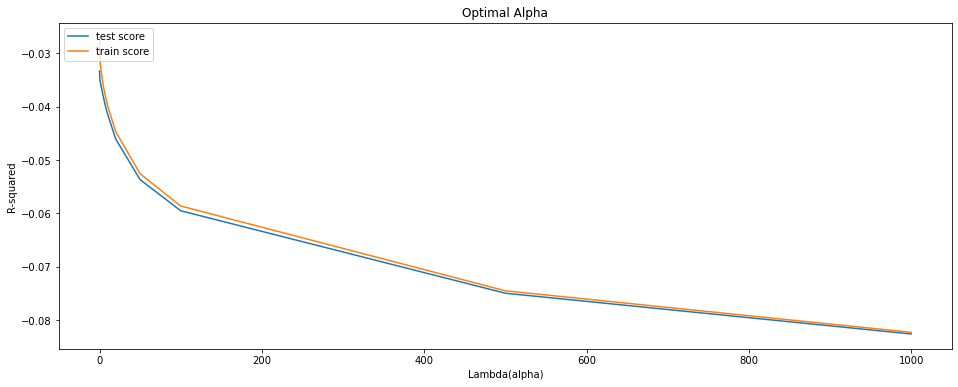

In [100]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results_ridge["param_alpha"], cv_results_ridge["mean_test_score"])
plt.plot(cv_results_ridge["param_alpha"], cv_results_ridge["mean_train_score"])
plt.xlabel('Lambda(alpha)')
plt.ylabel('R-squared')
plt.title("Optimal Alpha")
plt.legend(['test score', 'train score'], loc='upper left')

In [101]:
#As we know our best alpha for Ridge model is 0.01 
#So we build a model with alpha values closer to that to get a better view of test and train score
params = {'alpha': [0.001, 0.01, 0.05 ]}
alpha = 0.01

ridge = Ridge(alpha=alpha)

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Ridge(alpha=0.01),
             param_grid={'alpha': [0.001, 0.01, 0.05]}, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [102]:
#Checking cv results metrics
cv_results_ridge = pd.DataFrame(model_cv.cv_results_)
cv_results_ridge

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.011103      0.002374         0.007976        0.003515       0.001   
1       0.008772      0.001757         0.004384        0.000794        0.01   
2       0.013427      0.005167         0.006206        0.002058        0.05   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}          -0.029240          -0.035856          -0.035203   
1   {'alpha': 0.01}          -0.029360          -0.035819          -0.035443   
2   {'alpha': 0.05}          -0.029963          -0.035618          -0.036402   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.036723          -0.029953        -0.033395        0.003147   
1          -0.036198          -0.029816        -0.033327        0.003065   
2          -0.035021          -0.029856        -0.033372        0.002861   

   rank_test_score  split0_train_score  split1_train_score  \
0                3           -0.027122           -0.027138   
1                1           -0.027336           -0.027161   
2                2           -0.028212           -0.027271   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.026814           -0.027184           -0.027132   
1           -0.026985           -0.027360           -0.027382   
2           -0.027798           -0.028105           -0.028328   

   mean_train_score  std_train_score  
0         -0.027078         0.000134  
1         -0.027245         0.000151  
2         -0.027943         0.000379

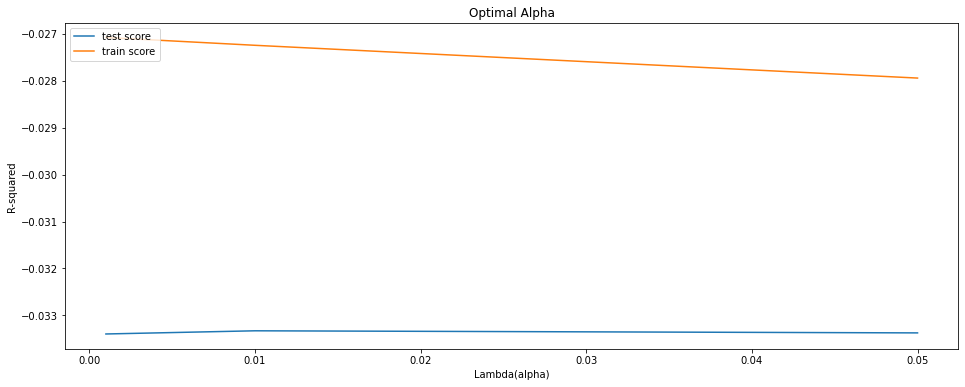

In [103]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results_ridge["param_alpha"], cv_results_ridge["mean_test_score"])
plt.plot(cv_results_ridge["param_alpha"], cv_results_ridge["mean_train_score"])
plt.xlabel('Lambda(alpha)')
plt.ylabel('R-squared')
plt.title("Optimal Alpha")
plt.legend(['test score', 'train score'], loc='upper left')

In [104]:
#Building our model on our chosen alpha for prediction
alpha = 0.0001

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_train_rfe, y_train) 

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test)

#### Here we can clearly see an edge around 0.01 which confirms our prediction of optimal alpha

In [105]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9172175780758315
0.8090046033334161
1.4057859561045678
1.4564508674457093
0.0013768716514246501
0.003325230290971939


Although the r-squared score has increased slightly for the test data. 
The test data r-squared is still quite less compared to the train data.

## Lasso

In [106]:
#Building Lasso model for our data
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [108]:
#Checking cv_results for our model
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.077843      0.067566         0.006319        0.000590      0.0001   
1        0.016990      0.001238         0.010237        0.005563       0.001   
2        0.013878      0.001798         0.007319        0.001880        0.01   
3        0.013099      0.001946         0.007209        0.001643        0.05   
4        0.010704      0.002284         0.005373        0.000754         0.1   
5        0.008639      0.000812         0.004711        0.001153         0.2   
6        0.012370      0.001921         0.006796        0.001825         0.3   
7        0.013126      0.001797         0.006806        0.002603         0.4   
8        0.010593      0.001959         0.007977        0.001413         0.5   
9        0.013978      0.002011         0.006014        0.001066         0.6   
10       0.011848      0.003036         0.006681        0.000784         0.7   
11       0.012127      0.004918         0.006454        0.001309         0.8   
12       0.009023      0.001175         0.005886        0.002696         0.9   
13       0.009386      0.001364         0.005533        0.000958           1   
14       0.009306      0.001607         0.005381        0.000782           2   
15       0.013760      0.001929         0.007614        0.001612           3   
16       0.011171      0.001978         0.005515        0.001930           4   
17       0.012910      0.001452         0.007060        0.001108           5   
18       0.013467      0.000763         0.007199        0.001958           6   
19       0.012458      0.001464         0.007726        0.002007           7   
20       0.014417      0.001470         0.008345        0.002139           8   
21       0.013424      0.002273         0.011721        0.005826           9   
22       0.008034      0.001359         0.004419        0.001067          10   
23       0.009215      0.000661         0.005853        0.001118          20   
24       0.010447      0.001330         0.005587        0.001391          50   
25       0.013189      0.001194         0.007846        0.001704         100   
26       0.012810      0.001502         0.009472        0.003310         500   
27       0.012378      0.003337         0.008634        0.001192        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.031385          -0.035387   
1    {'alpha': 0.001}          -0.038259          -0.042130   
2     {'alpha': 0.01}          -0.075639          -0.076965   
3     {'alpha': 0.05}          -0.101910          -0.101972   
4      {'alpha': 0.1}          -0.101910          -0.101972   
5      {'alpha': 0.2}          -0.101910          -0.101972   
6      {'alpha': 0.3}          -0.101910          -0.101972   
7      {'alpha': 0.4}          -0.101910          -0.101972   
8      {'alpha': 0.5}          -0.101910          -0.101972   
9      {'alpha': 0.6}          -0.101910          -0.101972   
10     {'alpha': 0.7}          -0.101910          -0.101972   
11     {'alpha': 0.8}          -0.101910          -0.101972   
12     {'alpha': 0.9}          -0.101910          -0.101972   
13     {'alpha': 1.0}          -0.101910          -0.101972   
14     {'alpha': 2.0}          -0.101910          -0.101972   
15     {'alpha': 3.0}          -0.101910          -0.101972   
16     {'alpha': 4.0}          -0.101910          -0.101972   
17     {'alpha': 5.0}          -0.101910          -0.101972   
18     {'alpha': 6.0}          -0.101910          -0.101972   
19     {'alpha': 7.0}          -0.101910          -0.101972   
20     {'alpha': 8.0}          -0.101910          -0.101972   
21     {'alpha': 9.0}          -0.101910          -0.101972   
22    {'alpha': 10.0}          -0.101910          -0.101972   
23      {'alpha': 20}          -0.101910          -0.101972   
24      {'alpha': 50}          -0.101910          -0.101972   
25     {'alpha': 100}          -0.101910     

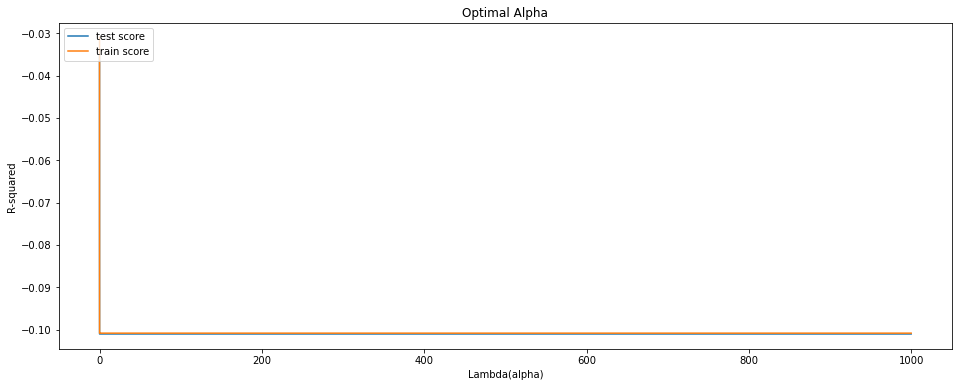

In [109]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results_lasso["param_alpha"], cv_results_lasso["mean_test_score"])
plt.plot(cv_results_lasso["param_alpha"], cv_results_lasso["mean_train_score"])
plt.xlabel('Lambda(alpha)')
plt.ylabel('R-squared')
plt.title("Optimal Alpha")
plt.legend(['test score', 'train score'], loc='upper left')

In [110]:
#As we know our best alpha for Lasso model is 0.0001 
#So we build a model with alpha values closer to that to get a better view of test and train score
params = {'alpha': [0.0001, 0.001, 0.01 ]}
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)  

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.037877      0.005927         0.006154        0.000442      0.0001   
1       0.014542      0.001868         0.006633        0.001354       0.001   
2       0.013300      0.001331         0.007714        0.001592        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.031385          -0.035387          -0.039038   
1   {'alpha': 0.001}          -0.038259          -0.042130          -0.044192   
2    {'alpha': 0.01}          -0.075639          -0.076965          -0.074873   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.035815          -0.033192        -0.034963        0.002587   
1          -0.039566          -0.042191        -0.041268        0.002102   
2          -0.075288          -0.077762        -0.076105        0.001085   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.032085           -0.028593   
1                2           -0.041523           -0.037828   
2                3           -0.076176           -0.075203   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.031190           -0.030989           -0.032106   
1           -0.039313           -0.041315           -0.041669   
2           -0.075906           -0.075487           -0.075796   

   mean_train_score  std_train_score  
0         -0.030993         0.001283  
1         -0.040330         0.001515  
2         -0.075714         0.000338

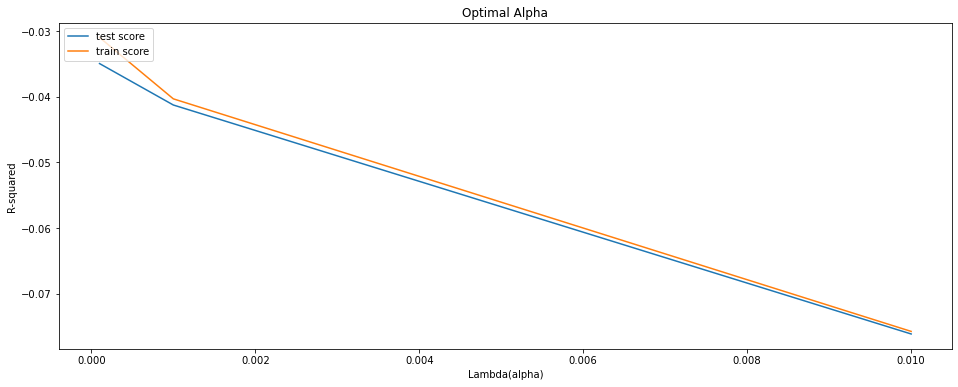

In [112]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results_lasso["param_alpha"], cv_results_lasso["mean_test_score"])
plt.plot(cv_results_lasso["param_alpha"], cv_results_lasso["mean_train_score"])
plt.xlabel('Lambda(alpha)')
plt.ylabel('R-squared')
plt.title("Optimal Alpha")
plt.legend(['test score', 'train score'], loc='upper left')

#### Here we can clearly see an edge between 0 and 0.0002 which confirms our prediction of optimal alpha for Lasso model

In [113]:
#Building our model on our chosen alpha
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test)

In [114]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8629121735990337
0.8274076648528911
2.3279838476326993
1.3161168312255285
0.0022801017116872665
0.0030048329480034898


The test and train r-squared seem close for Lasso Regression. Hence finalizing this as our final model

In [115]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.917218          0.917218          0.862912
1   R2 Score (Test)           0.808978          0.809005          0.827408
2       RSS (Train)           1.405785          1.405786          2.327984
3        RSS (Test)           1.456650          1.456451          1.316117
4       MSE (Train)           0.037106          0.037106          0.047750
5        MSE (Test)           0.057669          0.057665          0.054816

In [116]:
#Creating table for feature vs coefficient value
feat = pd.Series(X_train_rfe.columns)
coeff = round(pd.Series(lasso.coef_),6)
#coeff = pd.Series(lasso.coef_)

In [117]:
data = {"Features": feat, "Coeffs": coeff}

In [118]:
final = pd.concat(data, axis = 1)
final

Features    Coeffs
0           const  0.000000
1         LotArea  0.068765
2       YearBuilt  0.121435
3      BsmtFinSF1  0.070581
4      BsmtFinSF2  0.015780
..            ...       ...
71  GarageQual_Fa -0.017416
72  GarageQual_Gd  0.038087
73  GarageQual_NA -0.000001
74  GarageQual_Po  0.000000
75  GarageQual_TA  0.000000

[76 rows x 2 columns]

In [119]:
final.sort_values(by='Coeffs', ascending=False).head(15)

Features    Coeffs
10             GrLivArea  0.532417
66      RoofMatl_WdShngl  0.145885
61      RoofMatl_Membran  0.127523
2              YearBuilt  0.121435
7               1stFlrSF  0.104482
13            GarageArea  0.089910
60      RoofMatl_CompShg  0.089782
64      RoofMatl_Tar&Grv  0.085079
3             BsmtFinSF1  0.070581
1                LotArea  0.068765
22  Neighborhood_Crawfor  0.060537
45        Functional_Typ  0.058817
18      MSZoning_ResiLow  0.055826
65      RoofMatl_WdShake  0.050130
24  Neighborhood_Somerst  0.047645

- The optimal value of lambda for ridge is 0.01 
- The optimal value of lambda for lasso regression is 0.0001

## Subjective Questions and Answers

#### Question-Answer 1

In [120]:
#Taking double the value of our optimal alpha (0.01) for Ridge model
alpha = 0.02

ridge_new = Ridge(alpha=alpha)
        
ridge_new.fit(X_train_rfe, y_train) 

y_pred_train = ridge_new.predict(X_train_rfe)
y_pred_test = ridge_new.predict(X_test)


r2_train = r2_score(y_train, y_pred_train)
print(r2_train)


r2_test = r2_score(y_test, y_pred_test)
print(r2_test)


0.9155204942093139
0.8130081845938968


In [121]:
feat = pd.Series(X_train_rfe.columns)
coeff = pd.Series(ridge.coef_)

data = {"Features": feat,
        "Coeffs": coeff}

final_ridge = pd.concat(data, axis = 1)
final_ridge.sort_values(by='Coeffs', ascending=False).head(15)

Features    Coeffs
61  RoofMatl_Membran  1.326209
62    RoofMatl_Metal  1.241370
64  RoofMatl_Tar&Grv  1.157844
66  RoofMatl_WdShngl  1.131720
63     RoofMatl_Roll  1.110955
60  RoofMatl_CompShg  1.099233
65  RoofMatl_WdShake  1.072545
10         GrLivArea  0.268651
7           1stFlrSF  0.257651
6        TotalBsmtSF  0.227994
3         BsmtFinSF1  0.227719
1            LotArea  0.218440
26    RoofStyle_Shed  0.170818
8           2ndFlrSF  0.141232
2          YearBuilt  0.115002

In [122]:
#Taking double the value of our optimal alpha (0.0001) for Lasso Model
alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test)


r2_train = r2_score(y_train, y_pred_train)
print(r2_train)


r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

0.8458798710800257
0.8365071388437673


In [123]:
feat = pd.Series(X_train_rfe.columns)
coeff = pd.Series(lasso.coef_)

data = {"Features": feat, "Coeffs": coeff}

final = pd.concat(data, axis = 1)
final.sort_values(by='Coeffs', ascending=False).head(15)

Features    Coeffs
10             GrLivArea  0.509212
2              YearBuilt  0.114577
7               1stFlrSF  0.106782
13            GarageArea  0.098713
22  Neighborhood_Crawfor  0.058952
3             BsmtFinSF1  0.053664
66      RoofMatl_WdShngl  0.049932
45        Functional_Typ  0.041852
1                LotArea  0.037271
18      MSZoning_ResiLow  0.036774
20         LandSlope_Sev  0.031739
24  Neighborhood_Somerst  0.030573
16          CentralAir_Y  0.030371
72         GarageQual_Gd  0.028917
25  Neighborhood_StoneBr  0.025365

#### Question-Answer 3

In [124]:
# Dropping 5 top predictor variables and building model again
X_train_top5 = X_train_rfe.drop(['GrLivArea','YearBuilt','GarageArea','1stFlrSF','Neighborhood_Crawfor'],axis=1)
X_test_top5 = X_test.drop(['GrLivArea','YearBuilt','GarageArea','1stFlrSF','Neighborhood_Crawfor'],axis=1)

lasso = Lasso(alpha=0.0001)
        
lasso.fit(X_train_top5, y_train) 

y_pred_train = lasso.predict(X_train_top5)
y_pred_test = lasso.predict(X_test_top5)

r2_train = r2_score(y_train, y_pred_train)
print(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

0.8250210158764781
0.7872985631850018


In [125]:
feat = pd.Series(X_train_top5.columns)
coeff = pd.Series(lasso.coef_)

data = {"Features": feat,
        "Coeffs": coeff}

final = pd.concat(data, axis = 1)
final.sort_values(by='Coeffs', ascending=False).head(15)

Features    Coeffs
5            TotalBsmtSF  0.717965
61      RoofMatl_WdShngl  0.256351
60      RoofMatl_WdShake  0.252055
56      RoofMatl_Membran  0.233516
59      RoofMatl_Tar&Grv  0.216183
6               2ndFlrSF  0.211142
55      RoofMatl_CompShg  0.202811
57        RoofMatl_Metal  0.183743
1                LotArea  0.140694
2             BsmtFinSF1  0.089136
58         RoofMatl_Roll  0.077872
14      MSZoning_ResiLow  0.066092
44       BsmtFinType1_NA  0.064770
9            GarageYrBlt  0.061468
19  Neighborhood_Somerst  0.057640